## Abbashan USTAMEHMETOĞLU-20798141450-N.Ö.
## Dataset hakkında
### [Problem Hakkında](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
> **Küresel bir finans şirketinde veri bilimci olarak çalışıyorsunuz. Yıllar geçtikçe şirket temel banka bilgilerini topladı ve krediyle ilgili birçok bilgi topladı. Yönetim, manuel çabaları azaltmak amacıyla insanları kredi puanı gruplarına ayıracak akıllı bir sistem oluşturmak istiyor.**

### Görev
**Bir kişinin krediyle ilgili bilgileri göz önüne alındığında, kredi puanını sınıflandırabilecek bir makine öğrenimi modeli oluşturmak**

* **ID**         : Bir girişin benzersiz kimliğini temsil eder
* **Customer_ID**           : Bir kişinin benzersiz kimliğini temsil eder
* **Month**             : Yılın ayını temsil eder
* **Name**               : Bir kişinin ismini temsil eder
* **Age**                 : Kişinin yaşını temsil eder
* **SSN**                   : Bir kişinin sosyal güvenlik numarasını temsil eder
* **Occupation**            : Kişinin mesleğini temsil eder
* **Annual_Income**         : Kişinin yıllık gelirini temsil eder
* **Monthly_Inhand_Salary** : Bir kişinin aylık baz maaşını temsil eder
* **Num_Bank_Accounts**     : Bir kişinin sahip olduğu banka hesabı sayısını temsil eder

## Kütüphanelerimizi ekliyoruz

In [223]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb
from scipy import interp
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

## Datamızı okuyoruz

In [224]:
pd.set_option("display.max.columns", None)

df = pd.read_csv("train.csv",sep = "," , encoding = "utf-8")
df_test = pd.read_csv("test.csv",sep = "," , encoding = "utf-8")

## Datayı keşfediyoruz

In [225]:
df.shape , df_test.shape

((100000, 28), (50000, 27))

df.shape ve df_test.shape ifadeleri, pandas DataFrame'lerinin boyutlarını (satır ve sütun sayılarını) verir. Bu özellikler, her iki DataFrame'de kaç satır ve kaç sütun olduğunu hızlı bir şekilde görmenizi sağlar.

In [226]:
df.sample(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
44207,0x11905,CUS_0x875,August,NaN,53,182-17-1231,Entrepreneur,21568.28,1606.356667,3,6,9,0,NaN,26,19,2.26,2.0,Standard,1039.53,34.740760,19 Years and 6 Months,No,0.000000,194.54069760686437,Low_spent_Small_value_payments,256.09496905980234,Standard
97867,0x25371,CUS_0x379f,April,Brianl,55,566-26-1035,Accountant,39161.2,3088.433333,2,4,5,2,"Home Equity Loan, and Payday Loan",11,4,0.56,5.0,Good,1344.45,33.247124,21 Years and 0 Months,No,42.112824,135.08511616519542,Low_spent_Medium_value_payments,411.6453936064987,Poor
56118,0x15ed0,CUS_0x8d9,July,NaN,36,984-95-1206,Media_Manager,24881.15,2304.429167,4,6,19,2,"Debt Consolidation Loan, and Student Loan",5,9,17.84,9.0,Standard,931.68,37.737303,18 Years and 3 Months,Yes,40.173667,NaN,Low_spent_Small_value_payments,261.5989124419849,Poor


df.sample(3) ifadesi, pandas DataFrame'den rastgele üç satır örneği seçer ve bu seçilen satırları döndürür.

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Datamız hakkında genel bilgileri verir

In [228]:
df.describe().T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


pandas DataFrame'deki istatistiksel özet bilgilerini görsel olarak daha çekici hale getirmek için kullanılır. Bu işlem, özetin transpoze edilmesini, bir renk gradyanı uygulanmasını ve yazı tipinin değiştirilmesini içerir.

In [229]:
df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [230]:
missing_values_df=df.isna().sum()
missing_values_df

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


Aşağıda, pandas DataFrame'deki eksik değerlerin sayısını her bir sütun için hesaplayıp sonuçları bir Series olarak döndüren kodu bulabilirsiniz.

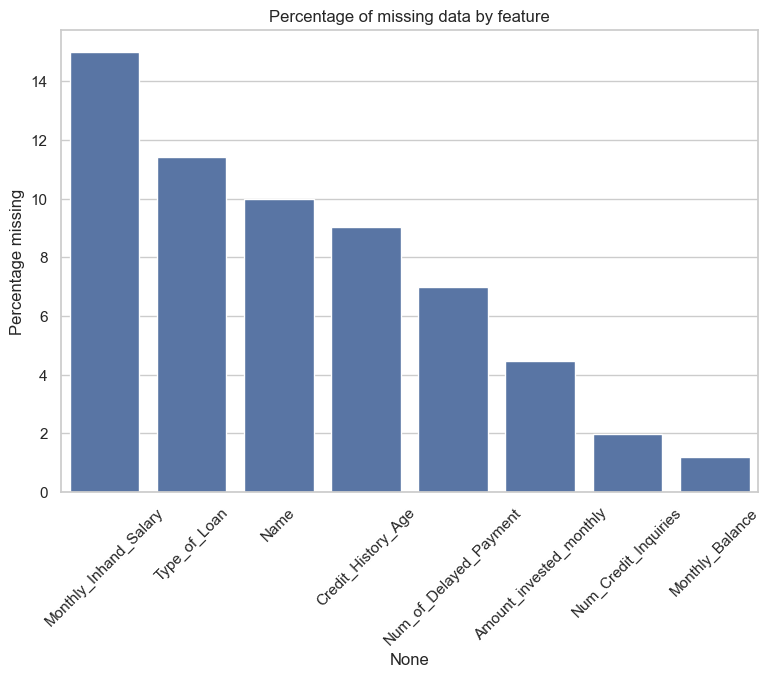

In [231]:
df_na = (missing_values_df / len(df)) * 100
#her sütundaki eksik değerlerin oranını, toplam satır sayısına bölerek yüzde cinsinden hesaplar.

# eksik değerlerin oranı sıfır olan sütunları (yani hiç eksik değeri olmayan sütunları) kaldırır. 
df_na = df_na.drop(df_na[df_na == 0].index)

#eksik değerlerin oranı yüksek olan sütunları önce listelemek üzere eksik değerlerin oranlarını büyükten küçüğe doğru sıralar.
df_na=df_na.sort_values(ascending=False)

# eksik değerlerin oranını görselleştirmek için bir çubuk grafik oluşturur. Bu grafik, her bir sütundaki eksik değerlerin yüzde oranını gösterir. 
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation=45)
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

In [232]:
df.columns
#Sütunlarımızın ısımlerını döndürür

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [233]:
object_columns=list(df.select_dtypes(include='object').columns)
# DataFrame içindeki sadece nesne türündeki (object) sütunların isimlerini içeren bir liste oluşturur.
#Bu, genellikle kategorik verilerin bulunduğu sütunları seçmek için kullanılır. 

In [234]:
df[object_columns].head
#DataFrame içinde sadece nesne türündeki (object) sütunların ilk birkaç satırını görüntüler.

<bound method NDFrame.head of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income Num_of_Loan  \
0      Scientist      19114.12     

In [235]:
df.shape
#Datanın Kaç satır ve sütundan oluştuğunu gösterir

(100000, 28)

## Sütunları ve data tiplerini düzenliyoruz

In [236]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
#DataFrame'deki her bir hücreye uygulanacak olan bir dönüşüm işlevini belirtir. Her hücredeki değer,
#bir dize (string) ise, bu değerin başındaki ve sonundaki boşlukları (' '), alt çizgileri (_), virgülleri (,), tırnak işaretlerini (") 
#kaldırır ve ardından bu değeri yeniden dizeye dönüştürür. 
#Ayrıca, belirli dize değerlerini ('', 'nan', '!@9#%8', '#F%$D@*&8') NaN ile değiştirir.

In [237]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [238]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))
# DataFrame'deki 'ID' sütunundaki her bir değeri onaltılık (hexadecimal) formattan ondalık formata dönüştürür.

In [239]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [240]:
df['Age'] = df.Age.astype(int)        
#Bu kod, 'Age' sütunundaki her bir değeri tam sayı (integer) türüne dönüştürür.

In [241]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)
#'SSN' sütunundaki değerleri işleyerek sayısal bir formata dönüştürür. Öncelikle, her bir değeri bir dize (string) olarak alır ve içerisindeki tireleri ( '-') kaldırır.
#Ardından, bu değeri ondalık bir sayıya dönüştürür.

In [242]:
df['Annual_Income'] = df.Annual_Income.astype(float)

In [243]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 

In [244]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [245]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [246]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [247]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

In [248]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [249]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

# 'Month_Converter', bir dizeyi (string) alır ve bu dizeyi belirli bir formatta yorumlayarak ay ve yıl bilgilerini alır,
#bunları ondalık bir sayıya dönüştürür ve sonuç olarak bu ay ve yıl bilgisini ay cinsinden toplam ay sayısına çevirir.

In [250]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)
# Credit_History_Age sütunundaki her bir değeri Month_Converter fonksiyonunu kullanarak dönüştürür ve sonucu float türüne çevirir

In [251]:
df.shape

(100000, 28)

In [252]:
object_columns=list(df.select_dtypes(include='object').columns)
df[object_columns].head()

,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [253]:
num_columns = list(df.select_dtypes(include=["int64","float64"]).columns)
df[num_columns].head()
#DataFrame'deki int64 ve float64 türündeki sütunların isimlerini içeren bir liste oluşturur. 

,ID,Customer_ID,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,821000265.0,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,5635,3392,821000265.0,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,5636,3392,821000265.0,19114.12,NaN,3,4,3,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,5637,3392,821000265.0,19114.12,NaN,3,4,3,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,5638,3392,821000265.0,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


## Eksik veriler ve datayı kullanılabilir hale getirme aşamaları

In [254]:
def columns_with_missing_values(DataFrame):
    missing_columns=(DataFrame.isnull().sum())
    return missing_columns[missing_columns > 0]
columns_with_missing_values(df)
#DataFrame'de eksik değerlere sahip sütunları belirler ve bu sütunların eksik değer sayılarını döndürür.

Name                        9985
SSN                         5572
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [255]:
missing_columns=(df.isnull().sum())
(missing_columns[missing_columns > 0]).index

Index(['Name', 'SSN', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [256]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
#eksik değerlere sahip olan sütunları sayısal (int64 ve float64) ve nesne (object) türlerine göre ayırır ve ayrı listelere atar.

In [257]:
df.shape

(100000, 28)

## Aykırı değerleri bulup işlem yapma

In [258]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns
#eksik değerlere sahip sayısal sütunların isimlerini içeren bir liste oluşturduk.

['SSN',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [259]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()
    #belirli bir sütunun veri dağılımını ve boxplot'unu göstermek için Matplotlib ve Seaborn kullanarak iki alt grafik oluşturur.
    #"Before Distribution" ve "After Distribution" başlıkları, grafikleri önce ve sonra olarak ayırt etmek için kullanılır.

In [260]:
data=df.copy()

### Sigorta numarası işlemleri

In [261]:
data.drop('SSN',axis=1,inplace=True)
#data DataFrame'inden 'SSN' sütununu kaldırır ve değişikliği kalıcı hale getirir 

In [262]:
data.shape
#Satır ve sütun sayısını aldık

(100000, 27)

### Aylık maaş

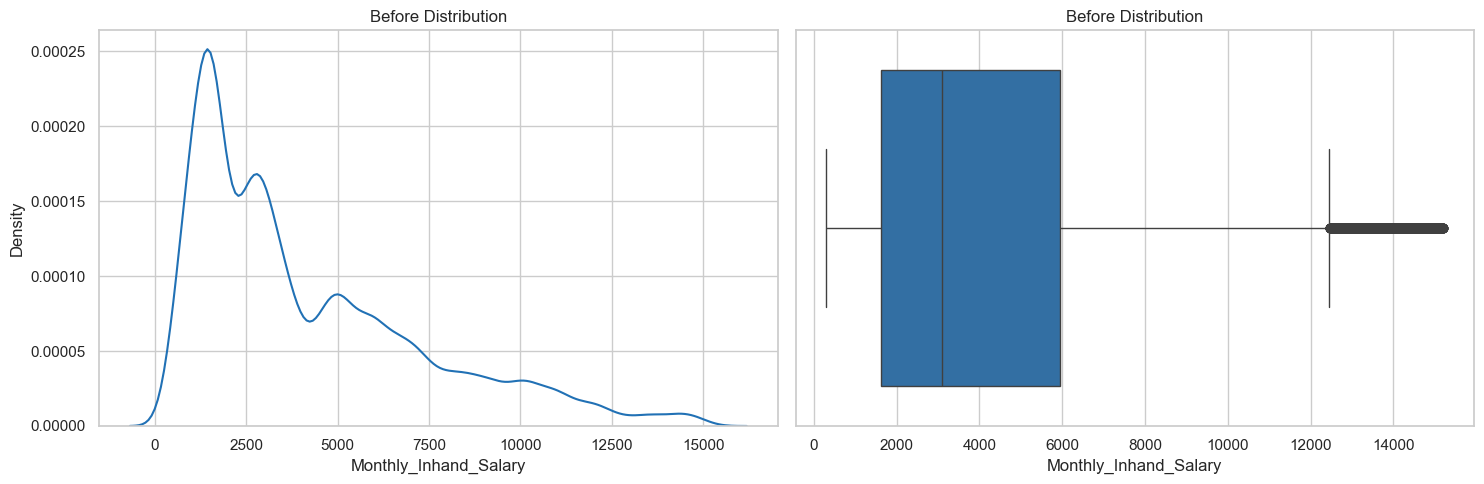

In [263]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=0)
# Monthly_Inhand_Salary' sütununun dağılımını ve kutu grafiğini çizdirebilirsiniz.

In [264]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']
#her bir satır için 'Monthly_Inhand_Salary' sütunundaki eksik değerleri doldurmak için bir fonksiyon tanımlar.
#       Eğer bir satırın 'Monthly_Inhand_Salary' değeri eksik ise, aynı 'Customer_ID' değerine sahip diğer satırlardan 'Monthly_Inhand_Salary' değerlerini alır
#        ve bu değerlerin modunu hesaplar. Eğer bir mod bulunursa, bu modu eksik değerin yerine koyar.
#        Eğer birden fazla moda sahip bir durum olursa, ilk mod değerini kullanır. Eğer hiçbir mod değeri bulunmazsa, NaN döndürür.        

In [265]:
data['Monthly_Inhand_Salary']=data.apply(get_Monthly_Inhand_Salary,axis=1)
#'Monthly_Inhand_Salary' sütunundaki eksik değerleri doldurmak için get_Monthly_Inhand_Salary fonksiyonunu kullanarak her satırı işler
#ve sonucu 'Monthly_Inhand_Salary' sütununa atar.

In [266]:
#Detect Outliers
print(data[data['Monthly_Inhand_Salary']>= 13500].shape)
data=data[data.Monthly_Inhand_Salary < 13500]
#'Monthly_Inhand_Salary' sütununda 13500'den büyük veya eşit olan değerlere sahip satırların sayısını yazdırır. 
#Ardından, DataFrame'deki 'Monthly_Inhand_Salary' sütununda 13500'den büyük olan satırları filtreleyerek, bu değerlere sahip satırları çıkarır.

(1280, 27)


In [267]:
data.shape

(98720, 27)

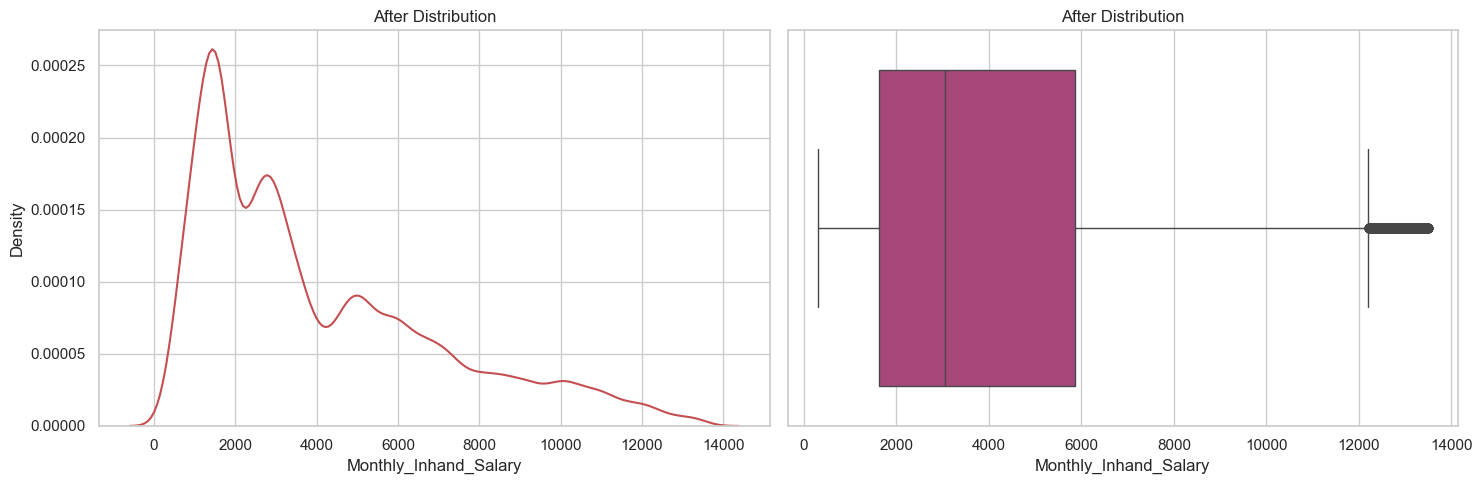

In [268]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=1)
#'Monthly_Inhand_Salary' sütununun dağılımını ve kutu grafiğini çizer.

### Bankaya Geciken ödeme sayısı

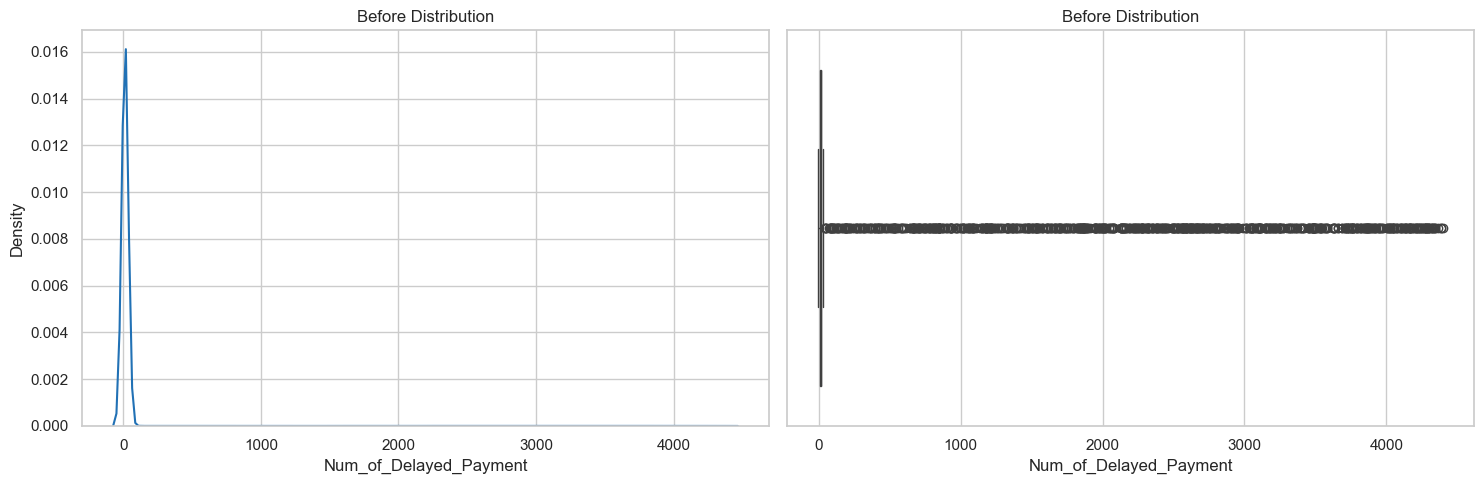

In [269]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=0)
# Bu kod, 'Num_of_Delayed_Payment' sütununun dağılımını ve kutu grafiğini çizer.


In [270]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']
#her bir satır için 'Num_of_Delayed_Payment' sütunundaki eksik değerleri doldurmak için bir fonksiyon tanımlar.
#Eğer bir satırın 'Num_of_Delayed_Payment' değeri eksik ise, aynı 'Customer_ID' değerine sahip diğer satırlardan 'Num_of_Delayed_Payment' değerlerini alır
#ve bu değerlerin modunu hesaplar. Eğer bir mod bulunursa, bu modu eksik değerin yerine koyar. 
#Eğer birden fazla moda sahip bir durum olursa, ilk mod değerini kullanır. Eğer hiçbir mod değeri bulunmazsa, NaN döndürür.        

In [271]:
data['Num_of_Delayed_Payment']=data.apply(get_Num_of_Delayed_Payment,axis=1)
#'Num_of_Delayed_Payment' sütunundaki eksik değerleri doldurmak için get_Num_of_Delayed_Payment fonksiyonunu kullanarak 
#her satırı işler ve sonucu 'Num_of_Delayed_Payment' sütununa atar.

In [272]:
print(data[data['Num_of_Delayed_Payment']>=150].shape)
print(data[data['Num_of_Delayed_Payment'] < 0].shape)
data=data[data['Num_of_Delayed_Payment']< 150]
data=data[data['Num_of_Delayed_Payment'] >= 0]
#İlk satır, 'Num_of_Delayed_Payment' sütununda 150'den büyük veya eşit olan değerlere sahip satırların sayısını yazdırır.
#İkinci satır ise, 'Num_of_Delayed_Payment' sütununda 0'dan küçük olan değerlere sahip satırların sayısını yazdırır.
#Ardından, DataFrame'deki 'Num_of_Delayed_Payment' sütununda 150'den büyük veya eşit olan ve 0'dan küçük olan değerleri filtreleyerek,
#bu değerlere sahip satırları çıkarır.

(703, 27)
(624, 27)


In [273]:
data.shape

(97393, 27)

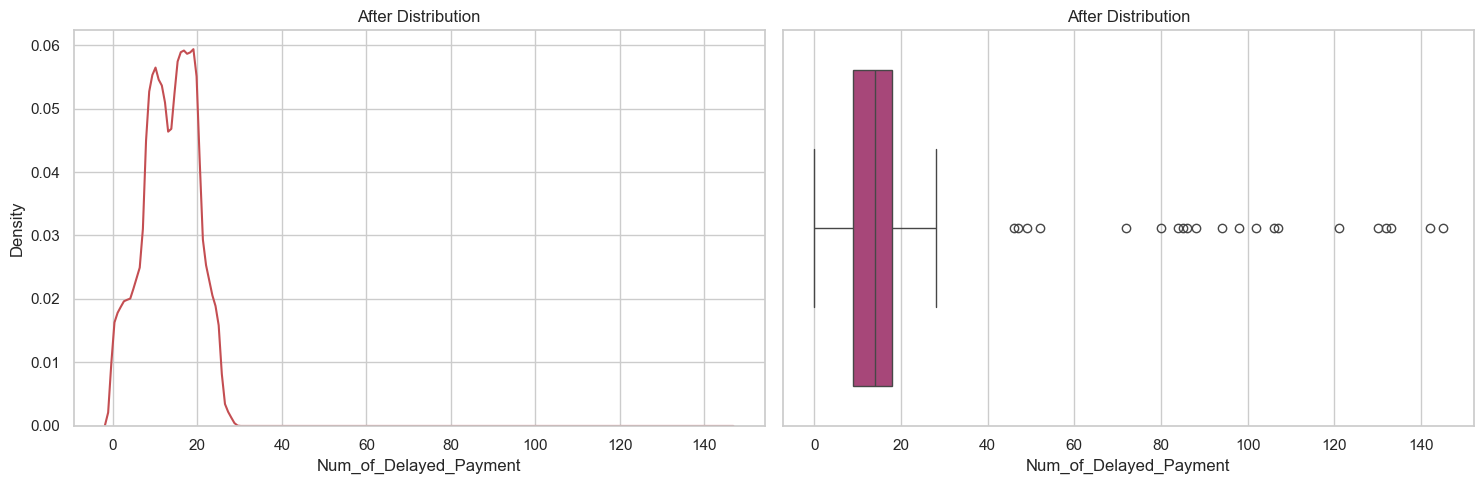

In [274]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=1)
#'Num_of_Delayed_Payment' sütununun dağılımını ve kutu grafiğini çizer.

### Değişen kredi limit

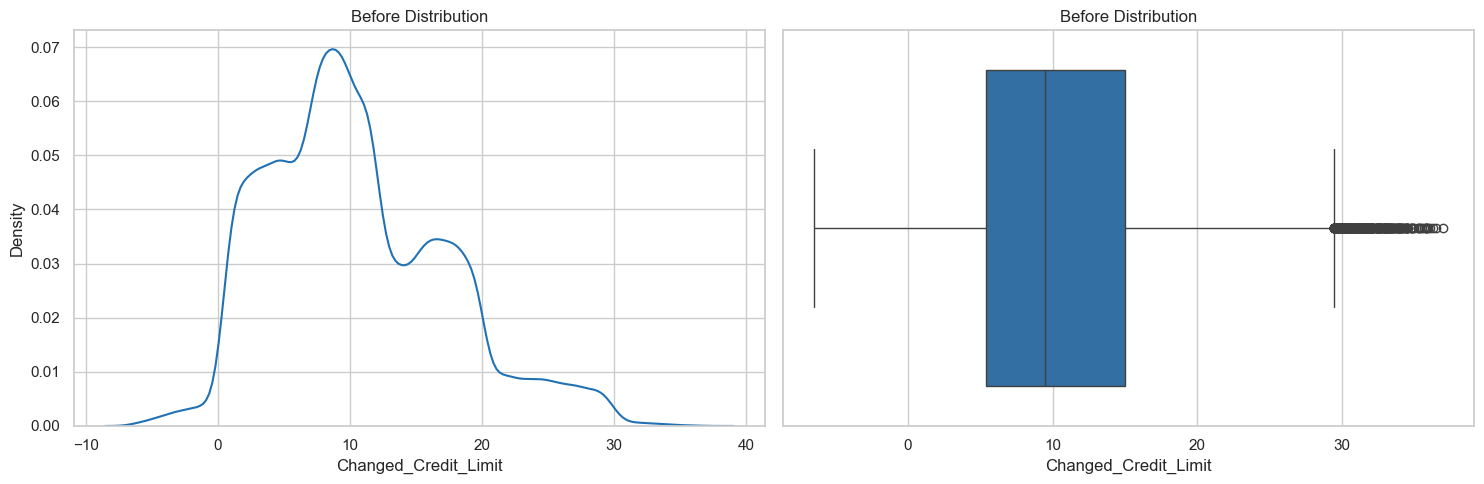

In [275]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=0)

In [276]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(data[data['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']
#her bir satır için 'Changed_Credit_Limit' sütunundaki eksik değerleri doldurmak için bir fonksiyon tanımlar. 
#        Eğer bir satırın 'Changed_Credit_Limit' değeri eksik ise, aynı 'Customer_ID' değerine sahip diğer satırlardan 'Changed_Credit_Limit' değerlerini alır
#        ve bu değerlerin modunu hesaplar. Eğer bir mod bulunursa, bu modu eksik değerin yerine koyar.
#        Eğer birden fazla moda sahip bir durum olursa, ilk mod değerini kullanır. Eğer hiçbir mod değeri bulunmazsa, NaN döndürür.        

In [277]:
data['Changed_Credit_Limit']=data.apply(get_Changed_Credit_Limit,axis=1)
#Yukarıdaki fonksiyonu tüm satırlara uygular

In [278]:
print(data[data['Changed_Credit_Limit']>=30].shape)
data=data[data['Changed_Credit_Limit'] < 30]

(254, 27)


In [279]:
data.shape

(97139, 27)

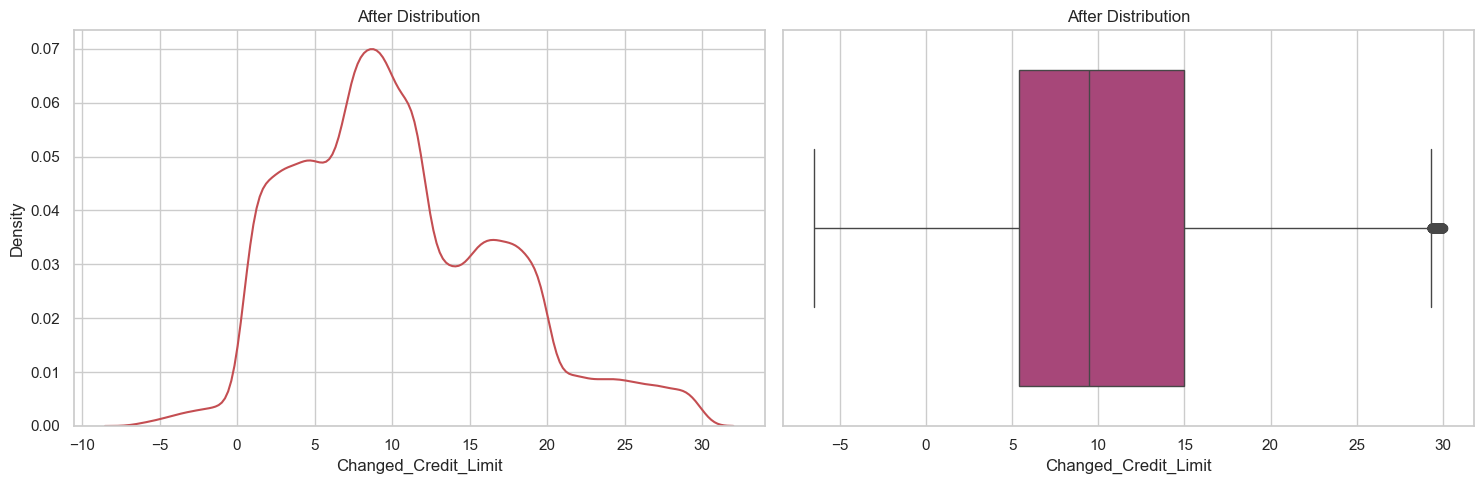

In [280]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=1)

### kredi incelemeleri

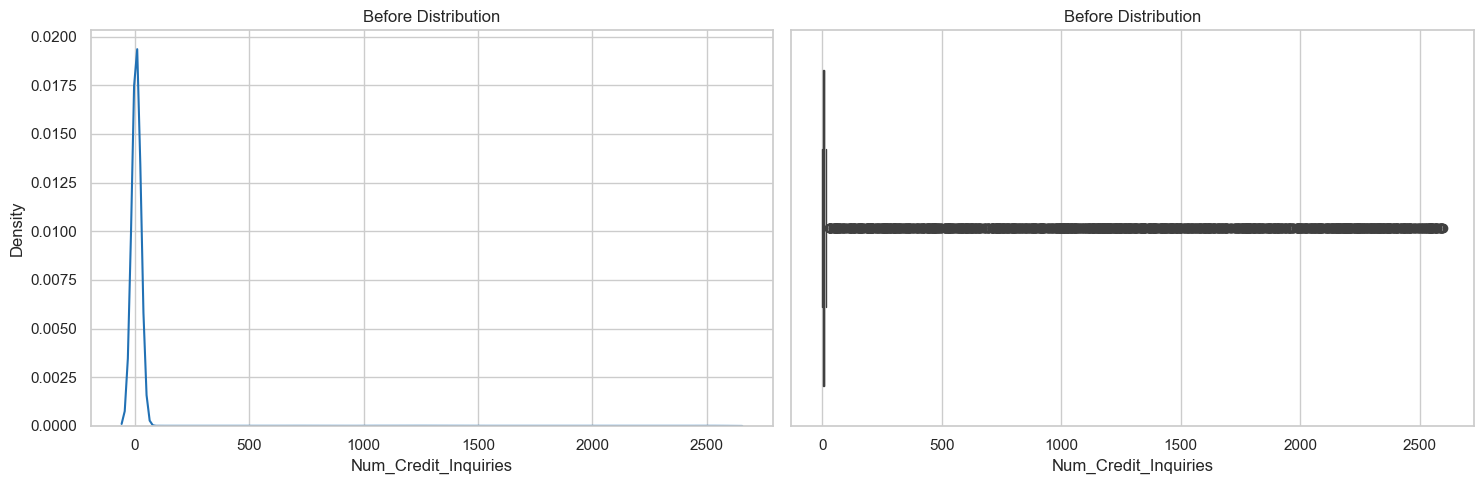

In [281]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=0)

In [282]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']
#Eksik olan satırdaki verileri doldurmak için yazdığım fonksiyon  

In [283]:
data['Num_Credit_Inquiries']=data.apply(get_Num_Credit_Inquiries,axis=1)

In [284]:
print(data[data['Num_Credit_Inquiries']>=50].shape)
data=data[data['Num_Credit_Inquiries']<50]

(1590, 27)


In [285]:
data.shape

(95549, 27)

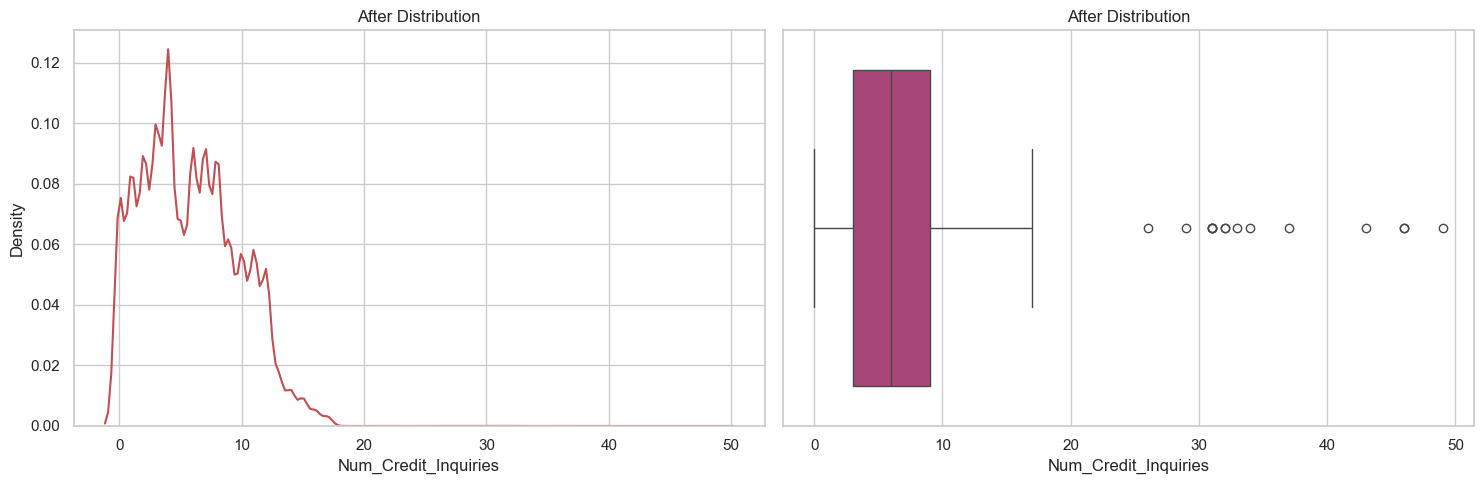

In [286]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=1)

### Kredi kullanmaya başladığı zamandan bu yana geçen süre( ay olarak)

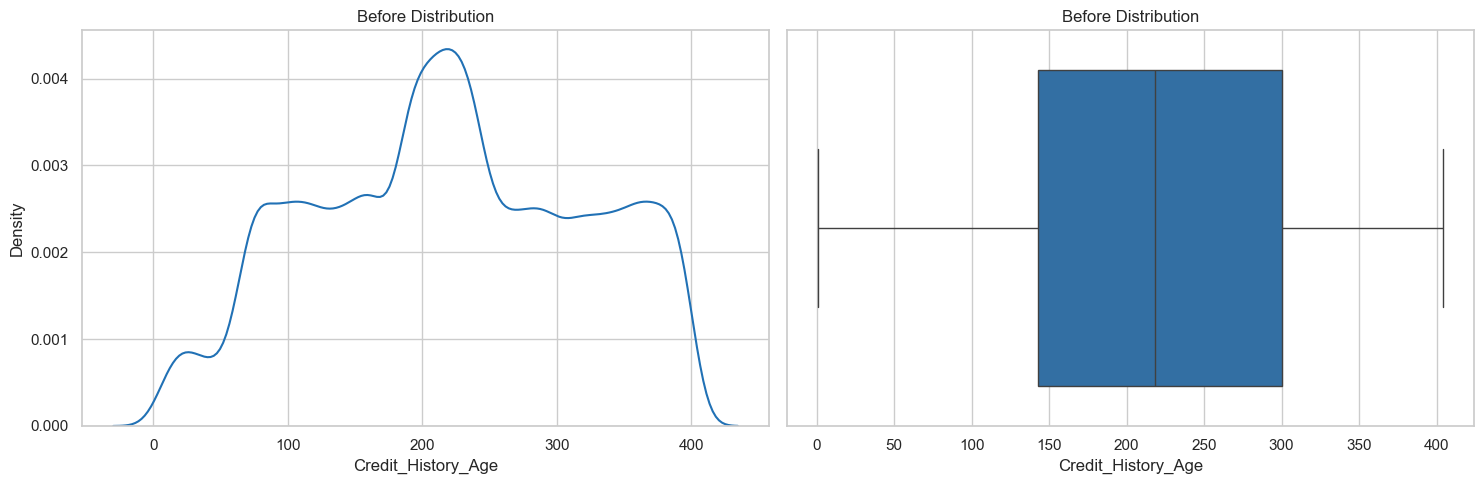

In [287]:
Distribution2(columne='Credit_History_Age',data=data,i=0)

In [288]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(data[data['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [289]:
data['Credit_History_Age']=data.apply(get_Credit_History_Age,axis=1)

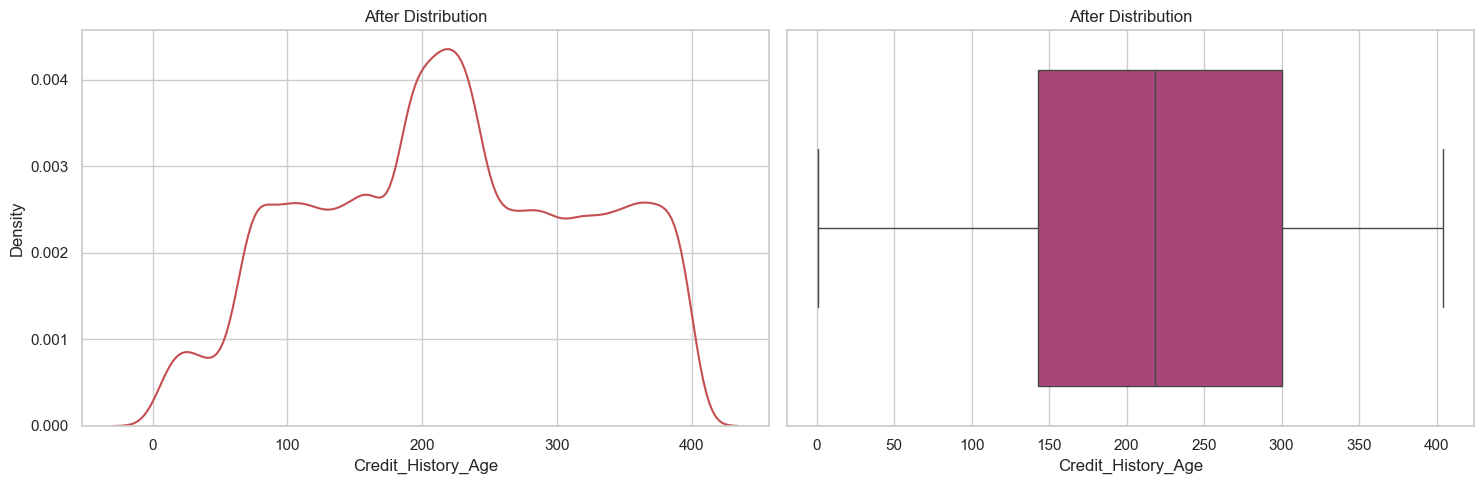

In [290]:
Distribution2(columne='Credit_History_Age',data=data,i=1)

### Müşterinin aylık yatırım miktarı

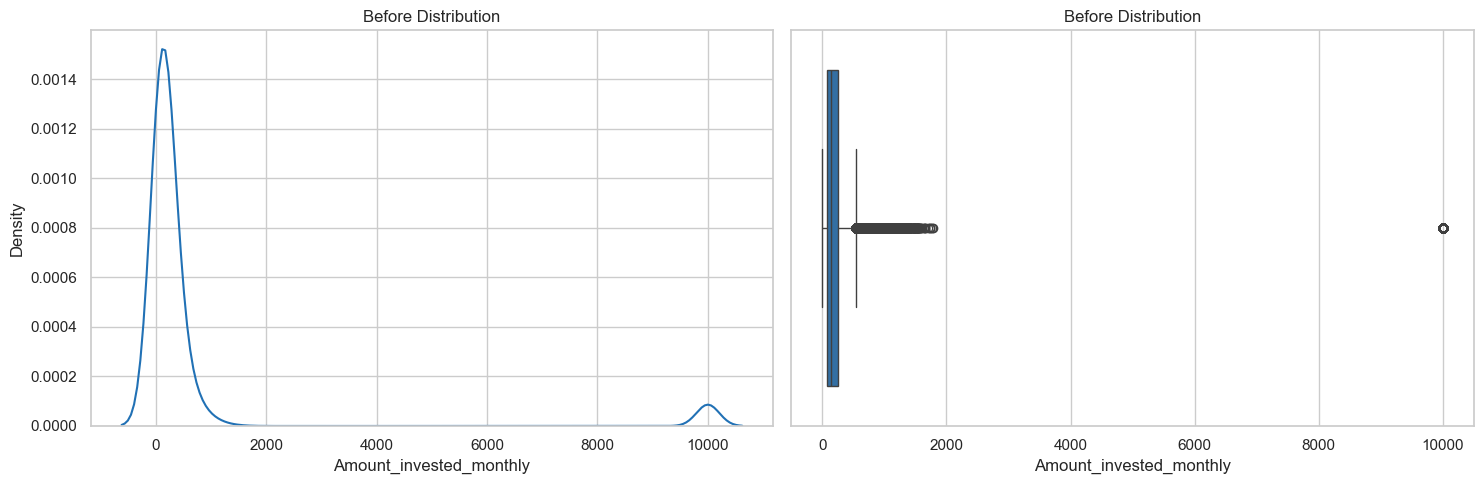

In [291]:
Distribution2(columne='Amount_invested_monthly',data=data,i=0)

In [292]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(data[data['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [293]:
data['Amount_invested_monthly']=data.apply(get_Amount_invested_monthly,axis=1)

In [294]:
print(data[data['Amount_invested_monthly']>=1000].shape)
data=data[data['Amount_invested_monthly']<1000]

(4907, 27)


In [295]:
data.shape

(90642, 27)

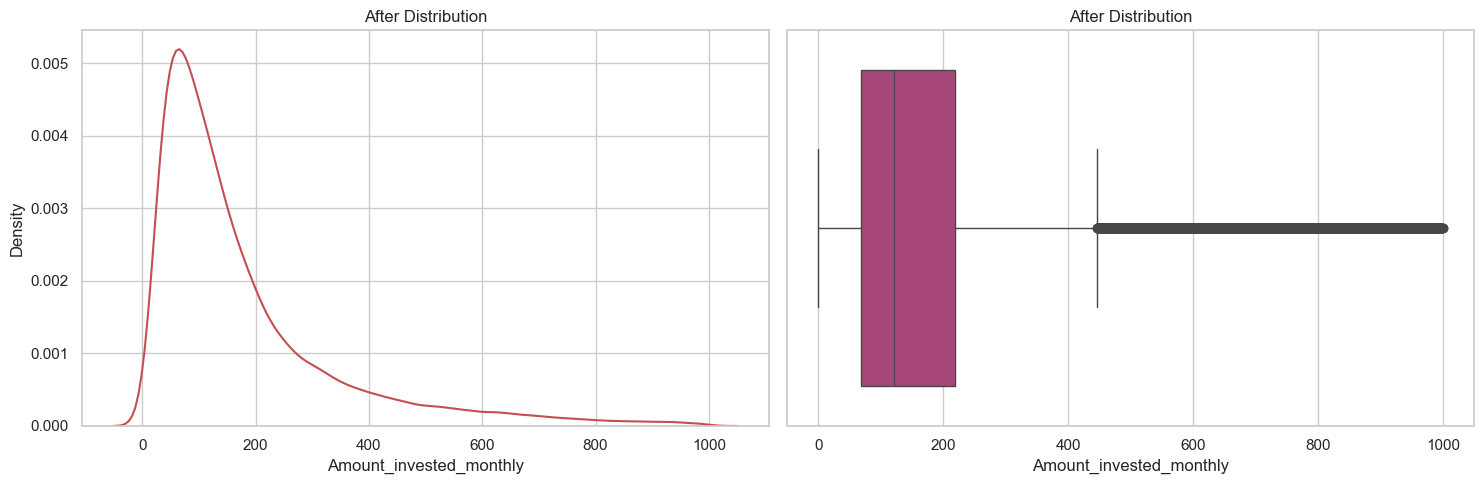

In [296]:
Distribution2(columne='Amount_invested_monthly',data=data,i=1)

### Aylık Bakiye

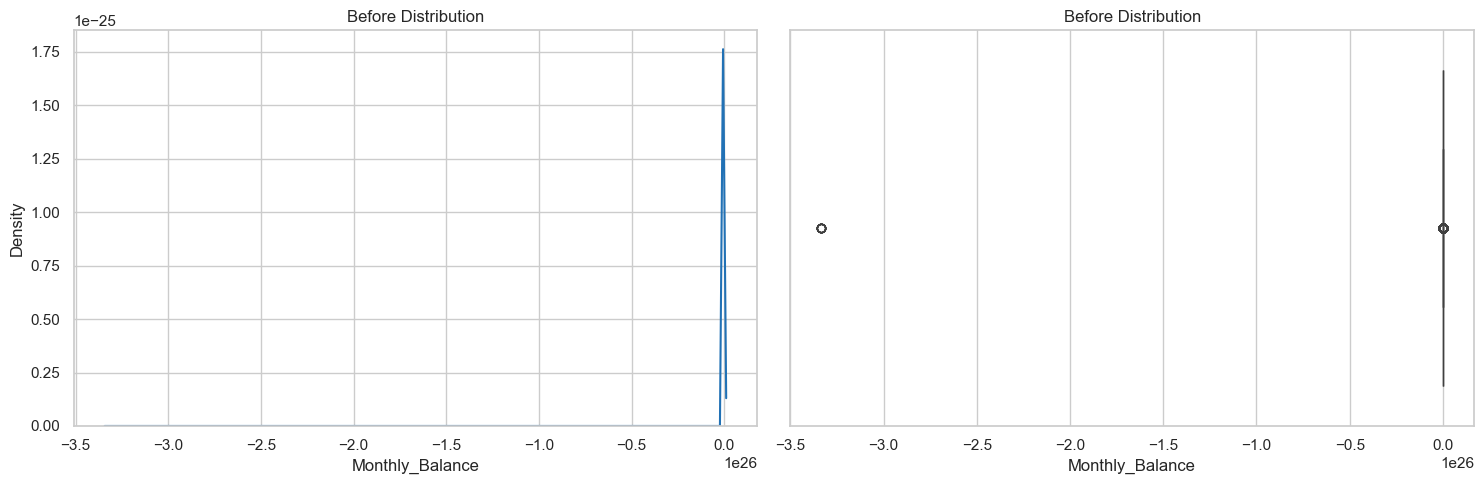

In [297]:
Distribution2(columne='Monthly_Balance',data=data,i=0)

In [298]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [299]:
data['Monthly_Balance']=data.apply(get_Monthly_Balance,axis=1)

In [300]:
print(data[data['Monthly_Balance'] <= 0].shape)
data = data[data['Monthly_Balance'] > 0]

(9, 27)


In [301]:
data.shape

(90633, 27)

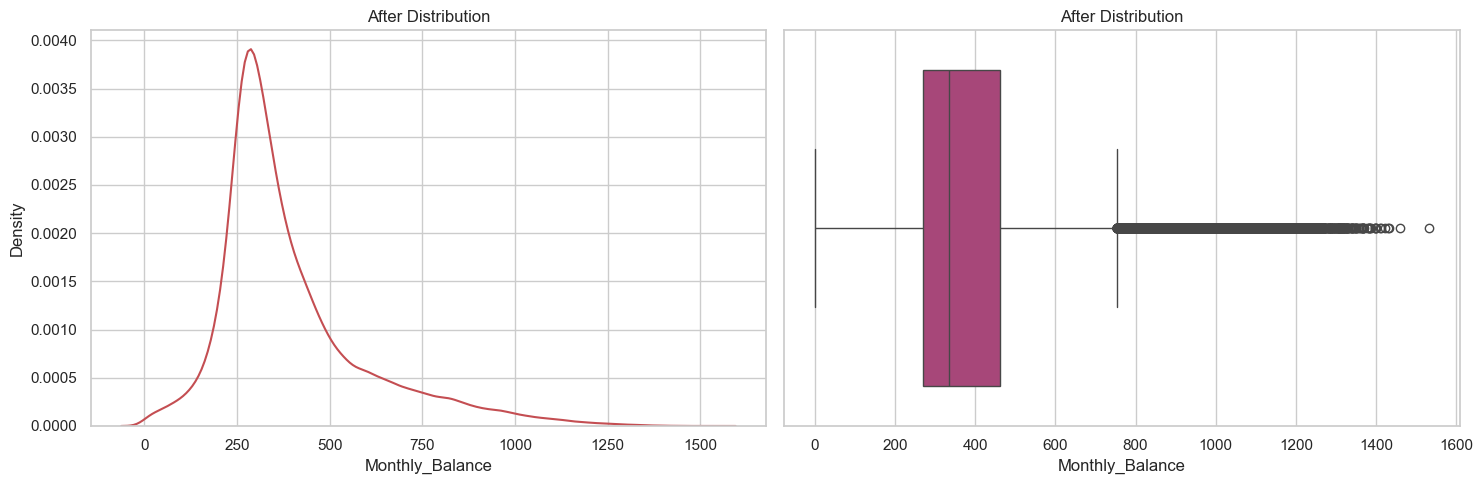

In [302]:
Distribution2(columne='Monthly_Balance',data=data,i=1)

 ____

In [303]:
missing_columns=data.isnull().sum()
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

---

In [304]:
columns_with_missing_values(data)

Name                  9035
Occupation            6395
Type_of_Loan         10220
Credit_Mix           18297
Payment_Behaviour     6894
dtype: int64

In [305]:
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
miss_object_columns

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

### Meslekleri

In [306]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(data[data['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [307]:
data['Occupation']=data.apply(get_Occupation,axis=1)

In [308]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [309]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [310]:
len(data[data['Occupation'].isnull()])

0

### Başvurulan kredi türü

In [311]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.82262,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.94496,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good


In [312]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')
#'Type_of_Loan' sütunundaki eksik değerleri 'Not Specified' olarak doldurur.
#Eğer bir satırın 'Type_of_Loan' değeri eksik ise, bu kod bu değeri 'Not Specified' olarak doldurur

In [313]:
#Type_of_Loan' sütunundaki değerleri işleyerek her bir farklı kredi türü için ayrı bir sütun oluşturur
#ve bu sütunlara ilgili kredi türüne ait olup olmadığına dair 1 veya 0 değerlerini atar.
def get_Diff_Values_Colum(df_data):
    valu=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Not Specified',
          'Payday Loan','Personal Loan','Student Loan']
    for x in valu:
        df_data[x] = np.NAN
        
    index=0
    for i in df_data['Type_of_Loan']:
        diff_value=[]
        if  ',' not in i:
            diff_value.append(i.strip())
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
        
        for x in valu:
            if x in diff_value:
                df_data[x].iloc[index]=1
        index=index+1
        
    for x in valu:
        df_data[x] = df_data[x].fillna(0)
        df_data[x] = df_data[x].astype(int) 
    return df_data

data=get_Diff_Values_Colum(data)

In [314]:
data.drop('Type_of_Loan',axis=1,inplace=True)

In [315]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.82262,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.94496,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0


## Kredi Türlerinin Çeşitliliği

In [316]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(data[data['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [317]:
data['Credit_Mix']=data.apply(get_Credit_Mix,axis=1)

In [318]:
data['Credit_Mix'] = data['Credit_Mix'].fillna(data['Credit_Mix'].mode()[0])

In [319]:
len(data[data['Credit_Mix'].isnull()])

0

## Ödeme Alışkanlıkları

In [320]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(data[data['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [321]:
data['Payment_Behaviour']=data.apply(get_Payment_Behaviour,axis=1)

In [322]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data['Payment_Behaviour'].mode()[0])

In [323]:
len(data[data['Payment_Behaviour'].isnull()])

0

 ----

In [324]:
columns_with_missing_values(data)

Name    9035
dtype: int64

----

In [325]:
num_columns = list(data.select_dtypes(include=["int64","float64",'int32']).columns)
num_columns=num_columns[2:-9]

In [326]:
process=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [327]:
for i in num_columns:
    if i not in process:
        print(i)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month


## Yaş

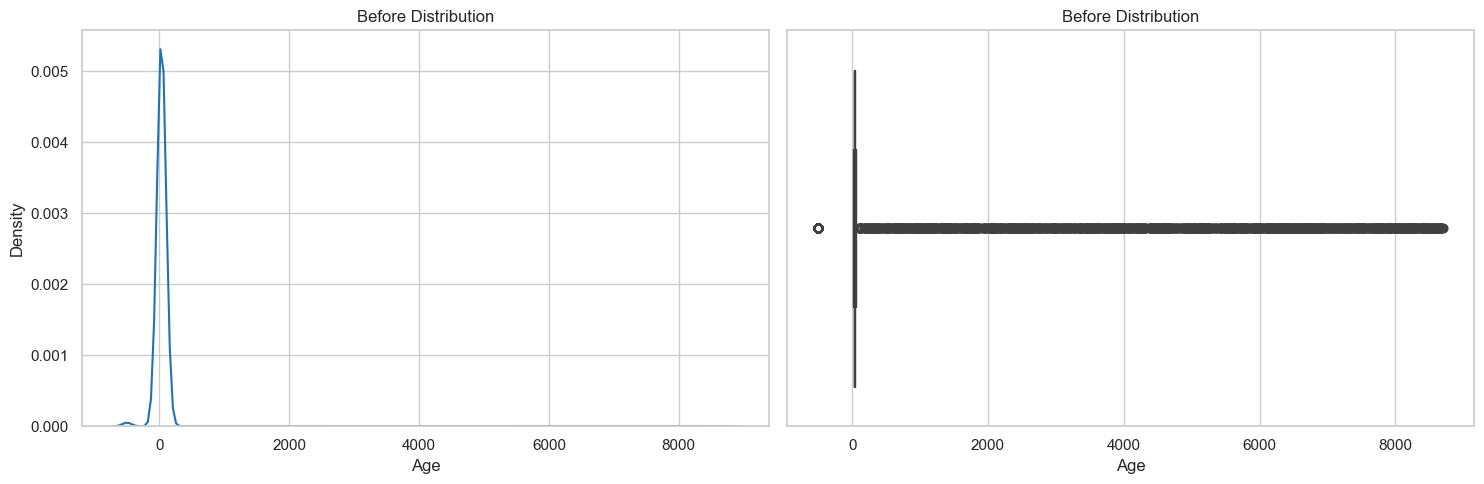

In [328]:
Distribution2(columne='Age',data=data,i=0)

In [329]:
print(data[data['Age'] > 60].shape)

(1714, 35)


In [330]:
def get_age(row):
    if (60 < row['Age']) or (0 > row['Age']) :
        Age=(data[data['Customer_ID']==row['Customer_ID']]['Age'].dropna()).mode()
        try:
            return Age[0]
        except:
            return np.NaN
    else:
        return row['Age']

In [331]:
data['Age']=data.apply(get_age,axis=1)

In [332]:
data[data['Age'] > 60].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [333]:
data.drop(data[data['Age'] > 60].index,axis=0,inplace=True)

In [334]:
data[data['Age'] < 0].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
45664,74130,28583,January,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,40.884276,280.0,No,130.619711,325.109918,High_spent_Medium_value_payments,629.031372,Good,0,0,0,1,1,0,1,0,0
45665,74131,28583,February,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,5,9.0,0.72,1.0,Good,904.93,28.185199,281.0,No,130.619711,308.567185,High_spent_Medium_value_payments,645.574105,Good,0,0,0,1,1,0,1,0,0
45669,74135,28583,June,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,8,9.0,0.72,1.0,Good,904.93,34.870185,285.0,No,130.619711,426.690980,Low_spent_Medium_value_payments,557.450309,Standard,0,0,0,1,1,0,1,0,0
45671,74137,28583,August,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,39.074470,287.0,No,130.619711,118.730491,High_spent_Medium_value_payments,835.410798,Standard,0,0,0,1,1,0,1,0,0


In [335]:
data.drop(data[data['Age']  < 0].index,axis=0,inplace=True)

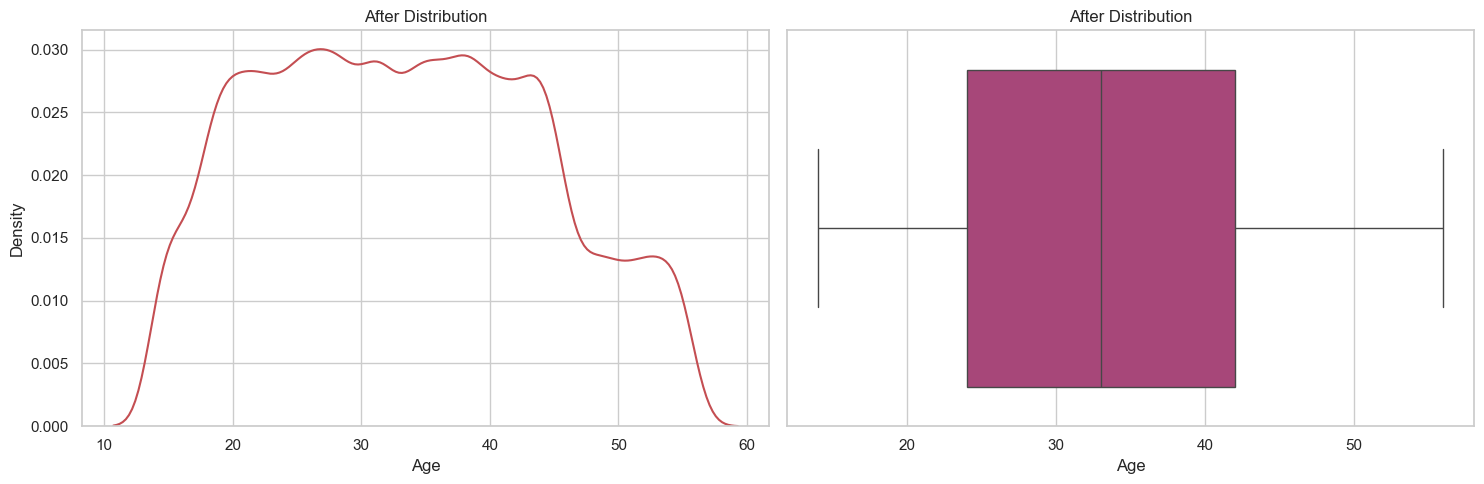

In [336]:
Distribution2(columne='Age',data=data,i=1)

## Yıllık gelir

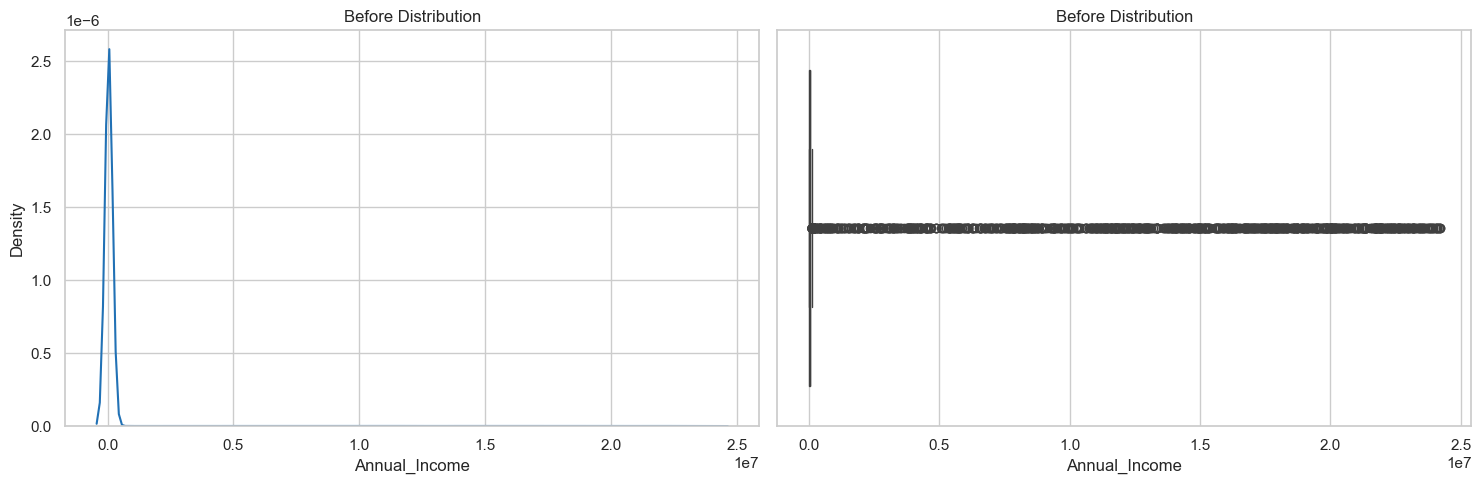

In [337]:
Distribution2(columne='Annual_Income',data=data,i=0)

In [338]:
def get_Annual_Income(row):
    if 150000 < row['Annual_Income'] :
        Annual_Income=(data[data['Customer_ID']==row['Customer_ID']]['Annual_Income'].dropna()).mode()
        try:
            return Annual_Income[0]
        except:
            return np.NaN
    else:
        return row['Annual_Income']

In [339]:
data['Annual_Income']=data.apply(get_Annual_Income,axis=1)

In [340]:
data[data['Annual_Income'] > 165000].sort_values('Annual_Income')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
56581,90503,15769,June,NaN,46,Accountant,167258.04,12986.315524,5,2,12,0,13,1.0,10.72,2.0,Good,476.64,29.757926,324.0,No,1213.854476,608.969535,Low_spent_Large_value_payments,1081.047465,Good,0,0,0,0,0,1,0,0,0
56582,90504,15769,July,Lionel Laurentb,46,Accountant,167258.04,12986.315524,566,2,12,0,13,1.0,10.72,2.0,Good,476.64,45.109866,325.0,No,1213.854476,464.293793,Low_spent_Large_value_payments,1205.723207,Good,0,0,0,0,0,1,0,0,0
56583,90505,15769,August,Lionel Laurentb,46,Accountant,167258.04,12986.315524,5,1123,12,0,13,0.0,10.72,2.0,Good,476.64,26.568010,324.0,No,1213.854476,963.127698,Low_spent_Large_value_payments,726.889302,Good,0,0,0,0,0,1,0,0,0
36013,59651,21693,June,Nick Edwardsv,26,Journalist,167753.52,13102.045569,3,3,12,3,7,7.0,4.62,2.0,Good,1079.59,41.106992,349.0,No,1190.730221,225.515481,High_spent_Large_value_payments,1160.714729,Good,0,0,0,0,1,1,0,1,0
35477,58847,41452,June,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,45.132045,381.0,No,1779.103254,398.840854,Low_spent_Large_value_payments,994.533827,Good,1,0,1,0,0,0,1,0,0
35478,58848,41452,July,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,-100,6,4.0,5.49,4.0,Good,393.01,31.889407,387.0,No,1779.103254,327.980626,High_spent_Medium_value_payments,1045.394055,Standard,1,0,1,0,0,0,1,0,0
35479,58849,41452,August,Danielr,52,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,40.146312,388.0,No,1779.103254,503.449545,High_spent_Medium_value_payments,869.925136,Good,1,0,1,0,0,0,1,0,0
9378,19700,13909,March,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,10.0,10.76,0.0,Good,685.01,40.275432,369.0,No,1634.213281,668.401726,Low_spent_Large_value_payments,1072.862608,Poor,0,0,0,0,0,1,0,0,0
9379,19701,13909,April,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,8.0,10.76,0.0,Good,685.01,44.798586,370.0,No,1634.213281,291.345581,High_spent_Medium_value_payments,1429.918752,Standard,0,0,0,0,0,1,0,0,0
9380,19702,13909,May,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,7,8.0,16.76,0.0,Good,685.01,33.439295,371.0,No,1634.213281,463.706400,High_spent_Small_value_payments,1267.557933,Standard,0,0,0,0,0,1,0,0,0


In [341]:
data.drop(data[data['Annual_Income']  > 165000].index,axis=0,inplace=True)

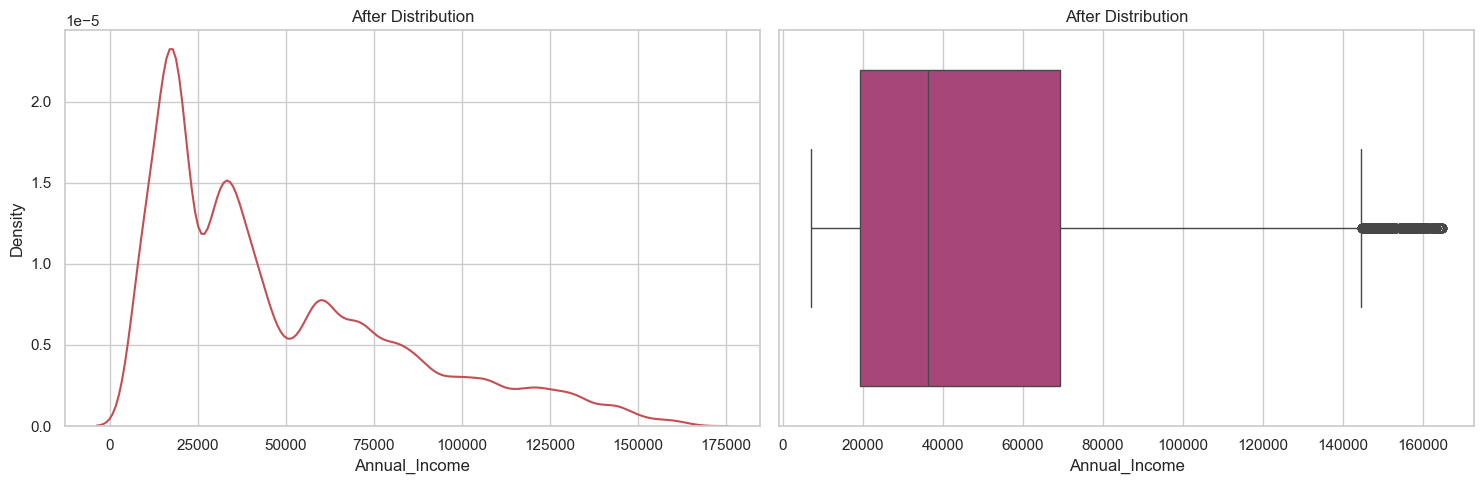

In [342]:
Distribution2(columne='Annual_Income',data=data,i=1)

## Bireyin banka hesapları

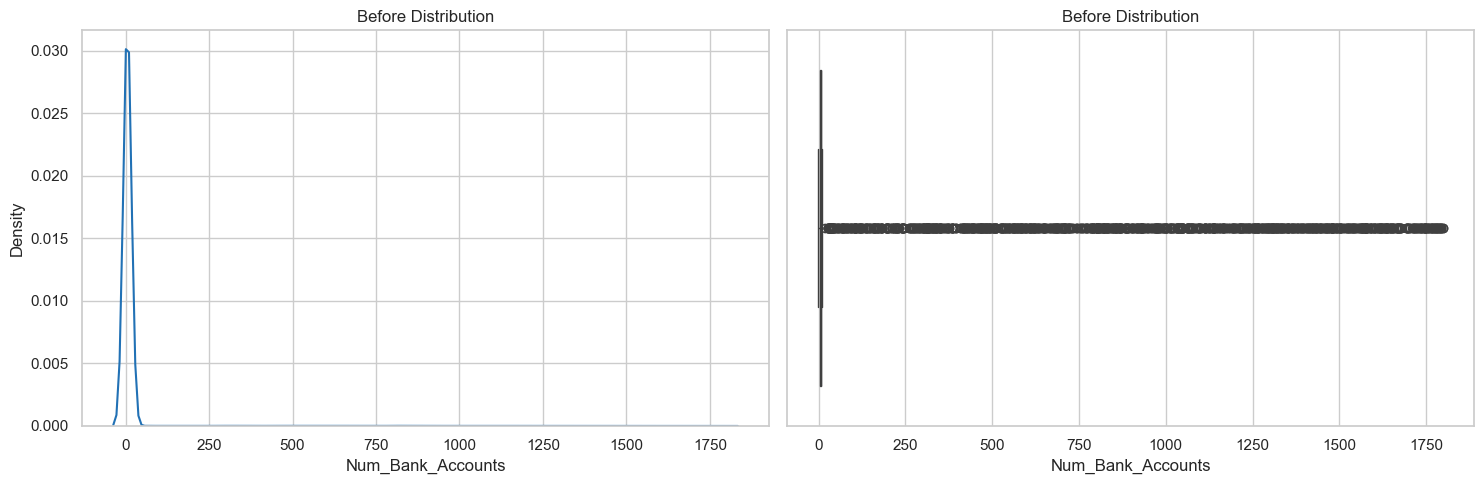

In [343]:
Distribution2(columne='Num_Bank_Accounts',data=data,i=0)

In [344]:
def get_Num_Bank_Accounts(row):
    if 12 < row['Num_Bank_Accounts'] :
        Num_Bank_Accounts=(data[data['Customer_ID']==row['Customer_ID']]['Num_Bank_Accounts'].dropna()).mode()
        try:
            return Num_Bank_Accounts[0]
        except:
            return np.NaN
    else:
        return row['Num_Bank_Accounts']

In [345]:
data['Num_Bank_Accounts']=data.apply(get_Num_Bank_Accounts,axis=1)

In [346]:
data[data['Num_Bank_Accounts'] > 12]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [347]:
data.drop(data[data['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data.drop(data[data['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)

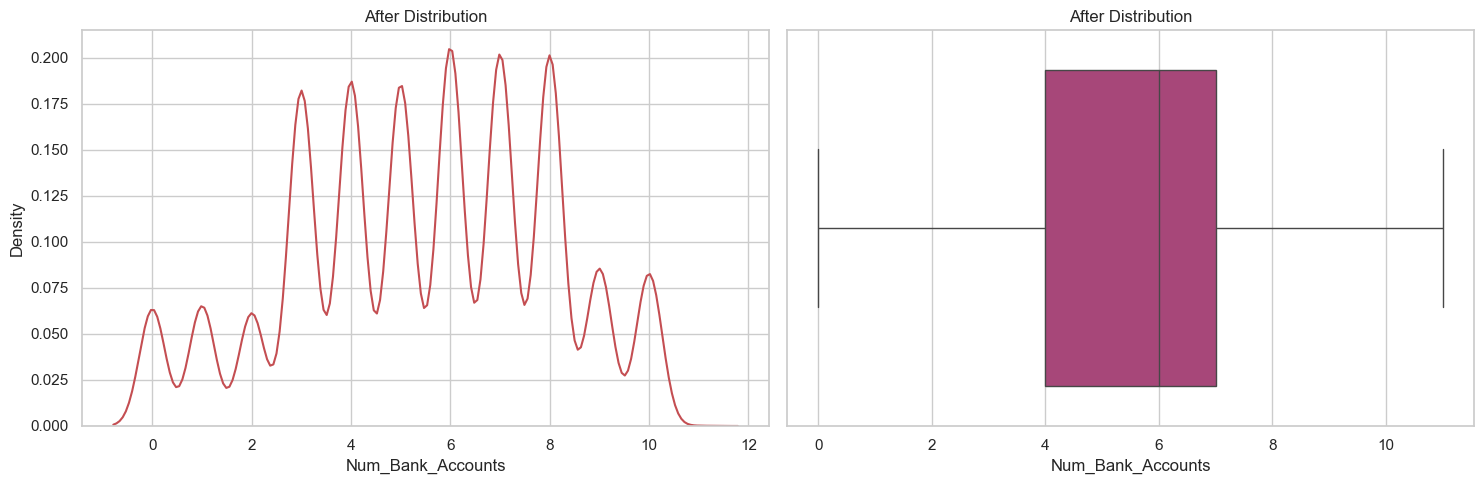

In [348]:
Distribution2(columne='Num_Bank_Accounts',data=data,i=1)

## Müşterinin kaç tane kredi kartı var

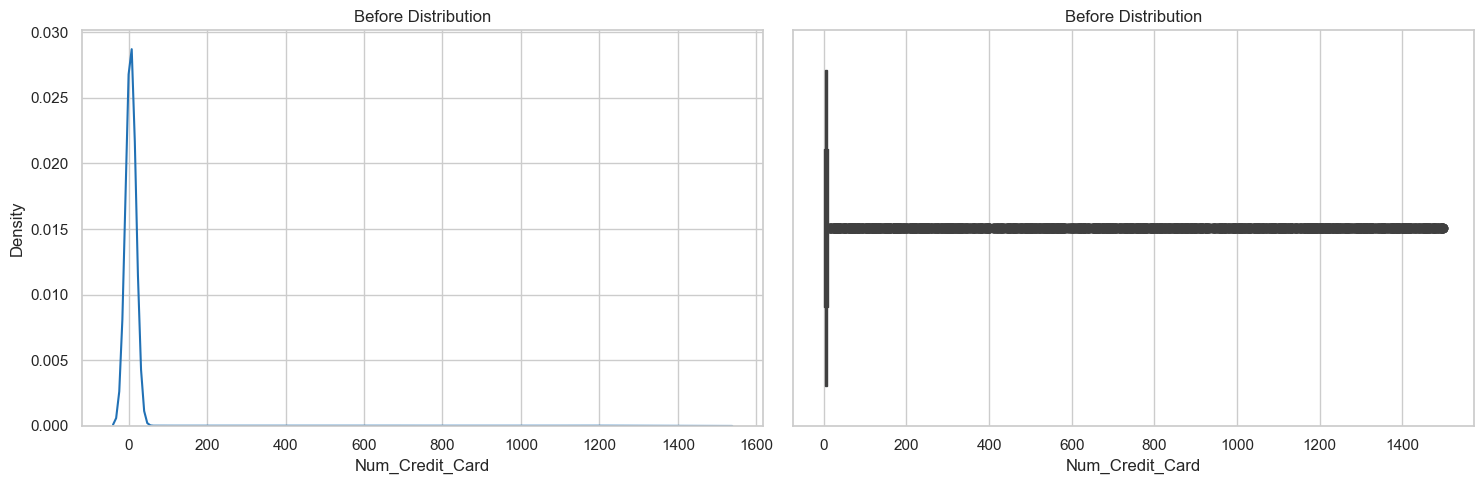

In [349]:
Distribution2(columne='Num_Credit_Card',data=data,i=0)

In [350]:
data[data['Num_Credit_Card'] > 14]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
40,5694,38382,January,Np,31,Lawyer,73928.46,5988.705000,4,1288,8,0,12,10.0,10.14,2.0,Good,548.20,39.962685,384.0,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good,0,0,0,0,0,1,0,0,0
157,5867,16640,June,Reema,32,Entrepreneur,19300.34,1512.361667,6,1029,17,5,51,17.0,9.95,8.0,Bad,2430.21,25.847791,223.0,Yes,49.572062,83.447449,Low_spent_Large_value_payments,288.216656,Poor,1,0,1,0,1,1,1,0,0
163,5877,4911,April,NaN,41,Musician,19514.88,1828.240000,7,488,17,0,30,12.0,4.17,2.0,Standard,881.40,34.503707,234.0,No,0.000000,45.388820,High_spent_Medium_value_payments,387.435180,Poor,0,0,0,0,0,1,0,0,0
207,5941,19779,August,Reijik,48,Entrepreneur,20787.69,1999.307500,8,1381,14,3,22,14.0,8.13,3.0,Standard,614.60,35.344188,221.0,No,42.221993,21.745531,High_spent_Large_value_payments,375.963226,Standard,0,1,0,1,0,0,0,0,0
215,5953,47455,August,Ashleyk,30,Writer,34290.12,2697.510000,9,898,25,7,52,9.0,13.96,13.0,Standard,2686.81,36.820649,171.0,Yes,185.111983,94.917216,High_spent_Small_value_payments,249.721801,Poor,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99605,155039,23917,June,Martinb,38,Writer,126514.72,10341.893333,8,1255,5,3,21,19.0,10.64,0.0,Standard,470.42,29.696182,355.0,No,61447.000000,902.340388,Low_spent_Small_value_payments,109.816092,Good,1,1,0,1,0,0,0,0,0
99611,155049,10281,April,Alistair Barre,31,Journalist,64901.37,5298.447500,3,514,20,-100,14,15.0,2.94,0.0,Standard,442.06,29.639741,373.0,Yes,0.000000,162.171160,High_spent_Medium_value_payments,617.673590,Standard,0,0,0,0,0,1,0,0,0
99615,155053,10281,August,Alistair Barre,32,Journalist,64901.37,5298.447500,3,232,20,0,19,18.0,2.94,3.0,Standard,442.06,29.145534,377.0,Yes,0.000000,126.263036,High_spent_Large_value_payments,643.581714,Standard,0,0,0,0,0,1,0,0,0
99619,155061,44646,April,Jino,30,Writer,142560.36,11773.030000,6,1430,13,1,23,15.0,11.22,0.0,Standard,220.75,34.671699,210.0,No,76.772094,982.946968,Low_spent_Large_value_payments,387.583938,Standard,0,0,0,0,0,0,0,0,1


In [351]:
def get_Num_Credit_Card(row):
    if 14 < row['Num_Credit_Card'] :
        Num_Credit_Card=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Card'].dropna()).mode()
        try:
            return Num_Credit_Card[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Card']

In [352]:
data['Num_Credit_Card']=data.apply(get_Num_Credit_Card,axis=1)

In [353]:
data.drop(data[data['Num_Credit_Card']  > 14].index,axis=0,inplace=True)

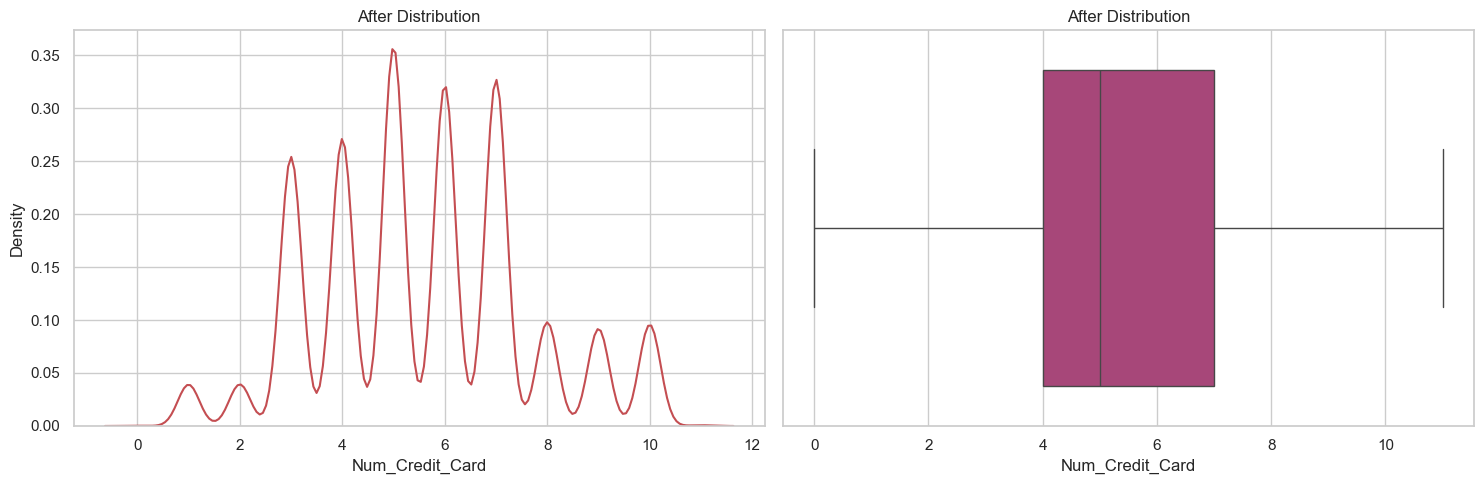

In [354]:
Distribution2(columne='Num_Credit_Card',data=data,i=1)

## Faiz oranı

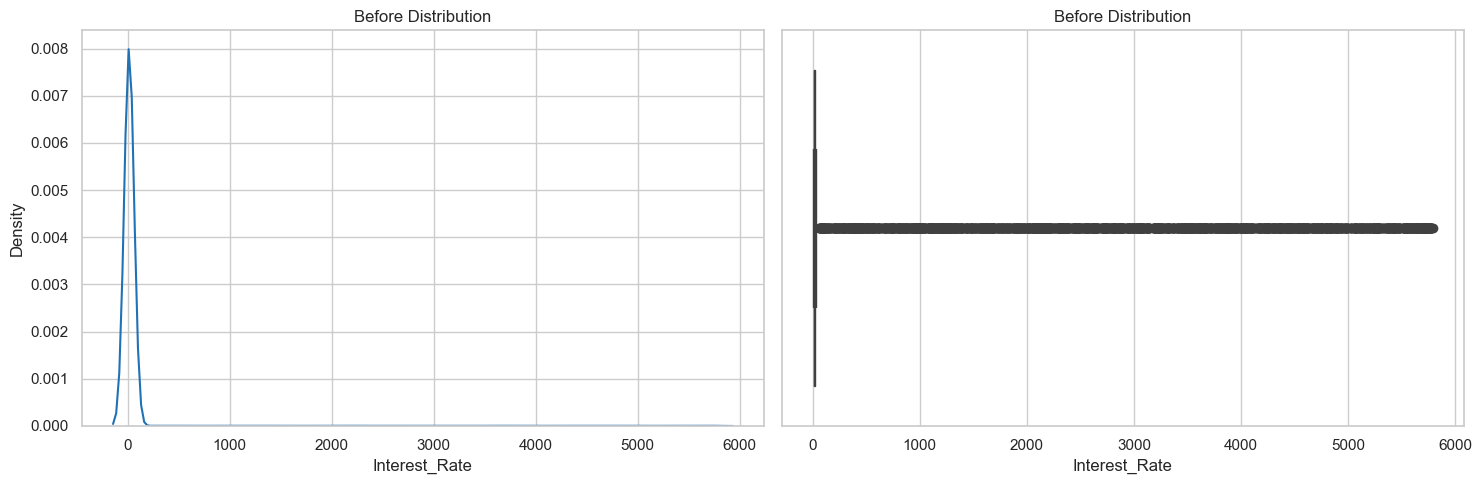

In [355]:
Distribution2(columne='Interest_Rate',data=data,i=0)

In [356]:
data[data['Interest_Rate'] > 35].sort_values('Interest_Rate')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
35442,58796,24464,March,NaN,15,Engineer,12680.815,1334.734583,4,5,59,0,26,11.0,8.79,6.0,Standard,704.18,33.487750,212.0,Yes,0.000000,34.169408,High_spent_Large_value_payments,339.304050,Standard,0,0,0,0,0,1,0,0,0
57905,92491,24226,February,Julien Toyerf,36,Entrepreneur,17869.290,1643.107500,6,3,60,4,30,13.0,10.20,2.0,Standard,276.09,38.310862,324.0,Yes,42.042420,127.532913,Low_spent_Large_value_payments,264.735417,Standard,1,0,0,0,0,1,1,0,0
61480,97854,28633,January,Julien Toyerq,35,Journalist,84050.500,7140.208333,3,5,64,3,2,0.0,7.16,1.0,Good,889.05,31.731434,287.0,No,175.377781,124.043048,High_spent_Large_value_payments,654.600004,Good,0,0,0,1,0,0,0,0,1
18907,33993,23687,April,Lisaz,39,Developer,76395.280,6074.273333,9,8,67,5,21,20.0,22.94,10.0,Bad,3026.97,39.686331,110.0,Yes,208.769613,70.252845,High_spent_Large_value_payments,570.419750,Standard,0,1,0,1,1,1,0,0,0
2648,9606,30096,January,Malathi Nayakw,43,Architect,68665.760,5619.146667,7,6,73,7,6,20.0,7.05,8.0,Standard,420.02,38.630616,145.0,Yes,329.666062,315.972607,Low_spent_Medium_value_payments,196.275998,Standard,0,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86815,135853,10886,August,Lesleyk,36,Accountant,50817.900,4531.825000,3,6,5774,2,16,15.0,17.05,12.0,Standard,2368.19,39.867715,105.0,NM,47.537232,79.419019,High_spent_Medium_value_payments,576.226249,Poor,0,0,0,1,0,0,0,0,1
77710,122196,9668,July,Zieminskia,40,Accountant,14717.280,1069.440000,5,2,5775,3,9,9.0,5.89,3.0,Good,148.52,28.221988,257.0,No,58962.000000,17.478496,High_spent_Large_value_payments,298.381784,Standard,0,0,0,1,0,0,0,0,1
88505,138391,6568,February,NaN,42,Musician,30683.420,2397.951667,4,6,5776,2,27,6.0,10.62,4.0,Standard,7.24,29.706823,310.0,No,46.884456,64.523403,High_spent_Medium_value_payments,378.387307,Standard,0,0,1,0,0,1,0,0,0
23512,40902,12203,January,Anna Yukhananovd,26,Manager,75804.940,6120.078333,0,1,5788,3,9,8.0,7.89,2.0,Good,330.82,35.641926,381.0,No,141.289448,51.867242,High_spent_Large_value_payments,658.851143,Good,0,1,0,1,1,0,0,0,0


In [357]:
def get_Interest_Rate(row):
    if 35 < row['Interest_Rate'] :
        Interest_Rate=(data[data['Customer_ID']==row['Customer_ID']]['Interest_Rate'].dropna()).mode()
        try:
            return Interest_Rate[0]
        except:
            return np.NaN
    else:
        return row['Interest_Rate']

In [358]:
data['Interest_Rate']=data.apply(get_Interest_Rate,axis=1)

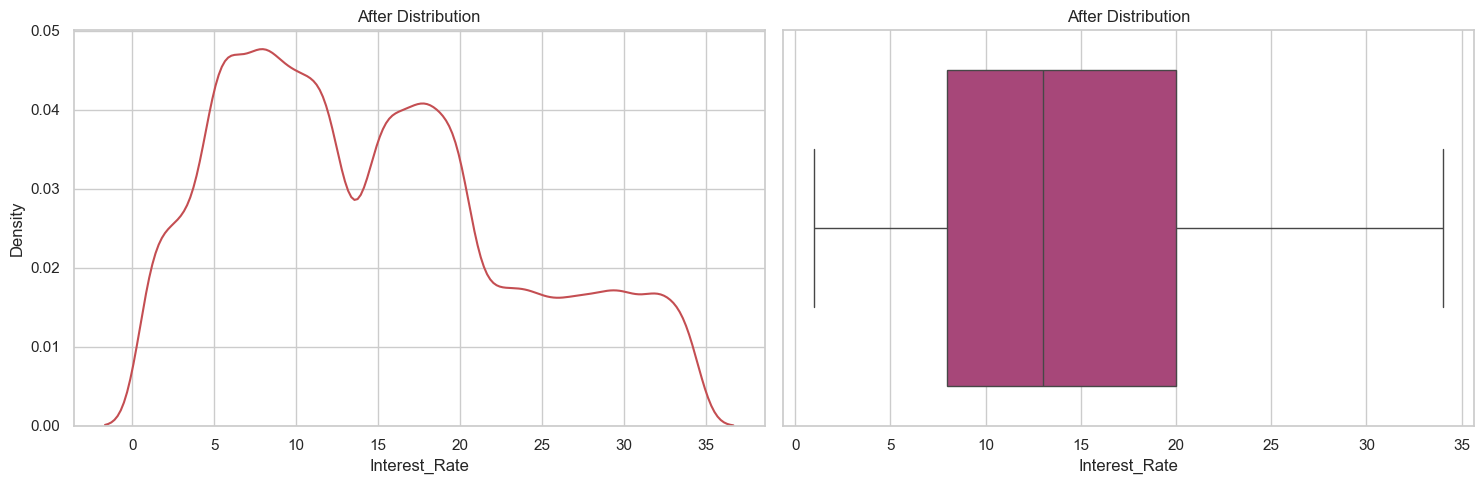

In [359]:
Distribution2(columne='Interest_Rate',data=data,i=1)

## Müşterinin toplam borç sayısı

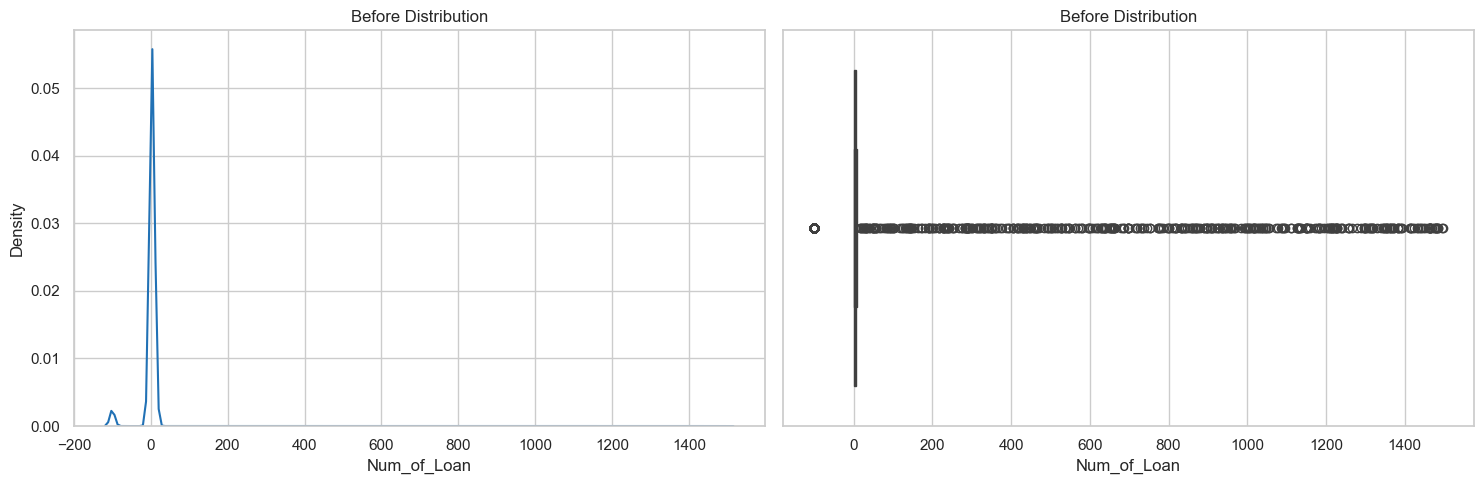

In [360]:
Distribution2(columne='Num_of_Loan',data=data,i=0)

In [361]:
def get_Num_of_Loan(row):
    if (8 < row['Num_of_Loan']) or (0 > row['Num_of_Loan']):
        Num_of_Loan=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Loan'].dropna()).mode()
        try:
            return Num_of_Loan[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Loan']

In [362]:
data['Num_of_Loan']=data.apply(get_Num_of_Loan,axis=1)

In [363]:
data.drop(data[data['Num_of_Loan']  < 0].index,axis=0,inplace=True)

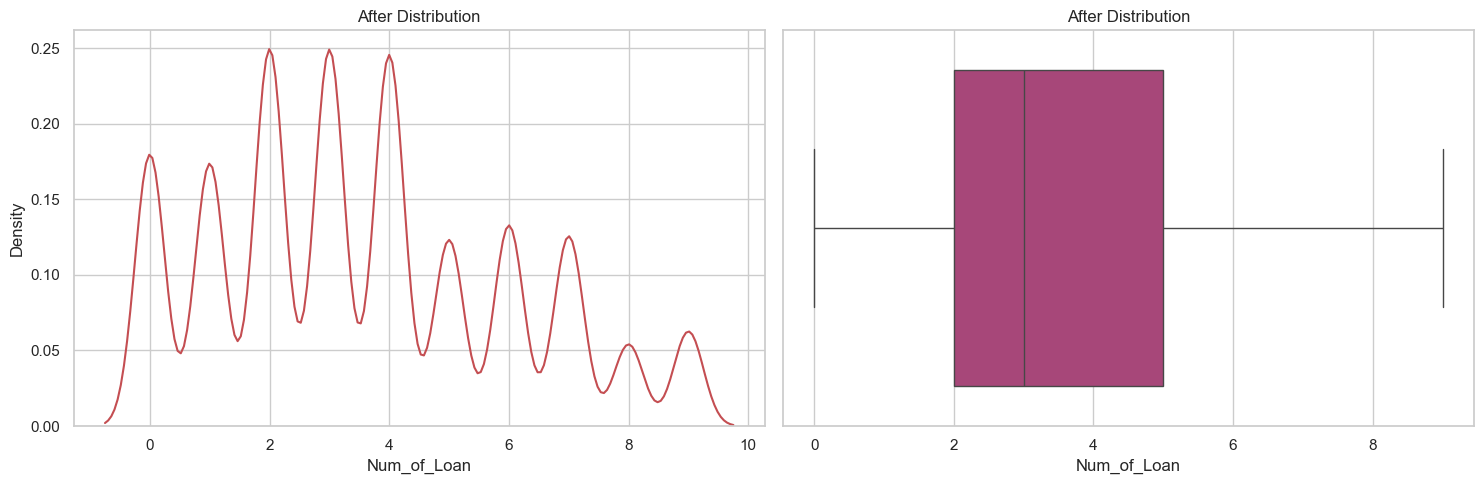

In [364]:
Distribution2(columne='Num_of_Loan',data=data,i=1)

## Bir müşterinin borçlarını ne kadar zamanında ödediğini  veren Gösteren grafik

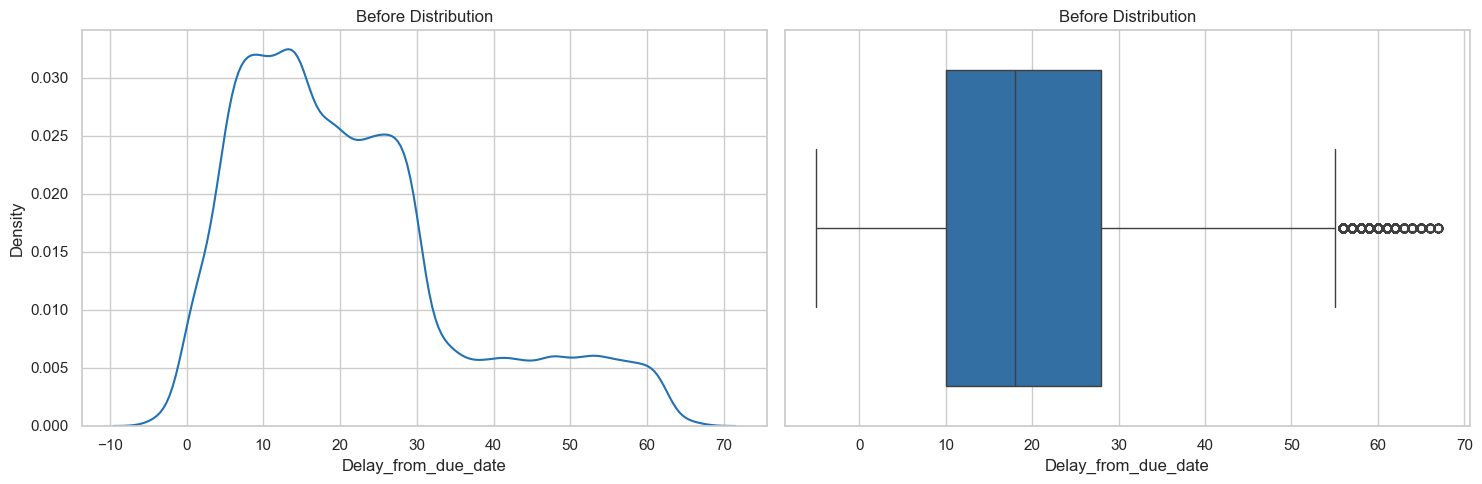

In [365]:
Distribution2(columne='Delay_from_due_date',data=data,i=0)

## Müşterinin kalan borç miktarı

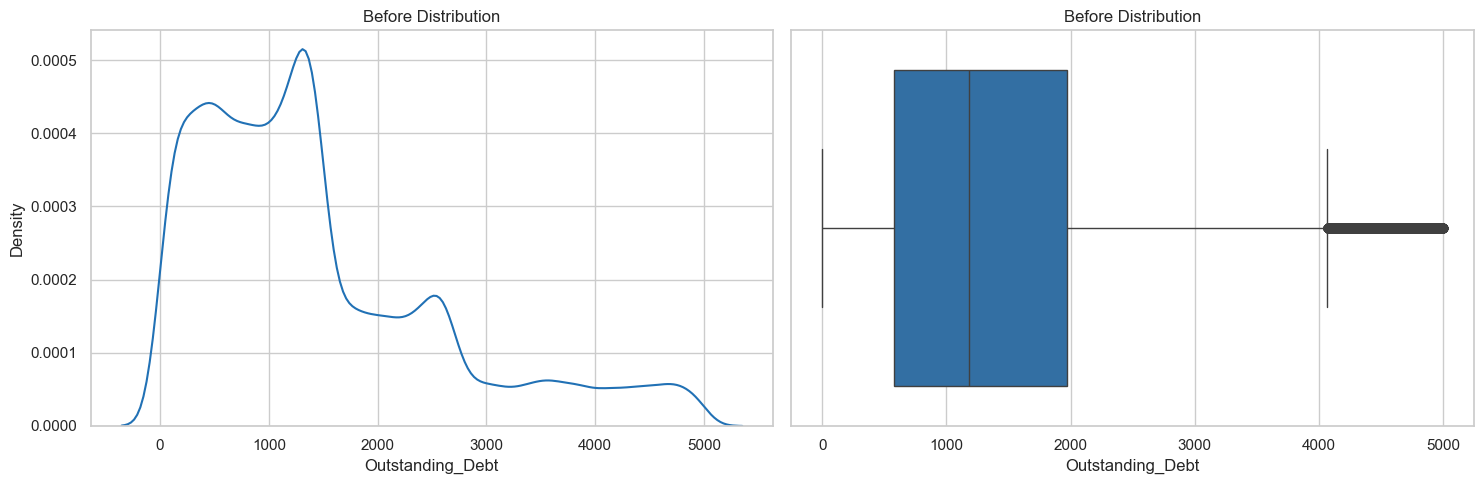

In [366]:
Distribution2(columne='Outstanding_Debt',data=data,i=0)

## Bir müşterinin kredi limitine göre kullandığı kredi miktarının oranı

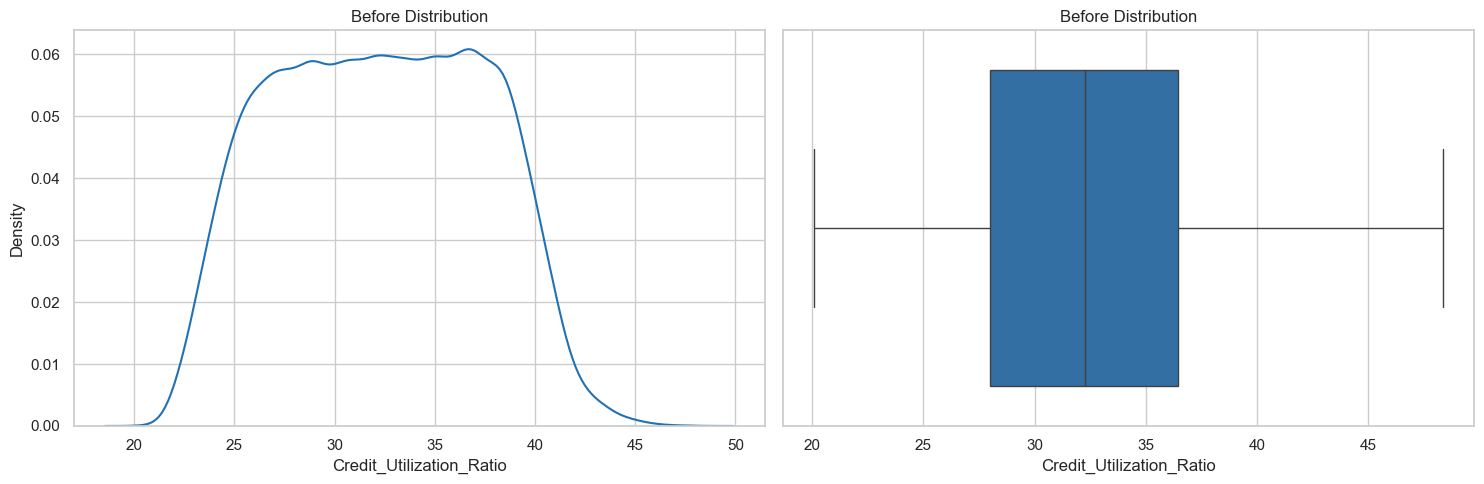

In [367]:
Distribution2(columne='Credit_Utilization_Ratio',data=data,i=0)

## Bir müşterinin aylık olarak ödediği tüm kredi taksitlerinin toplamı

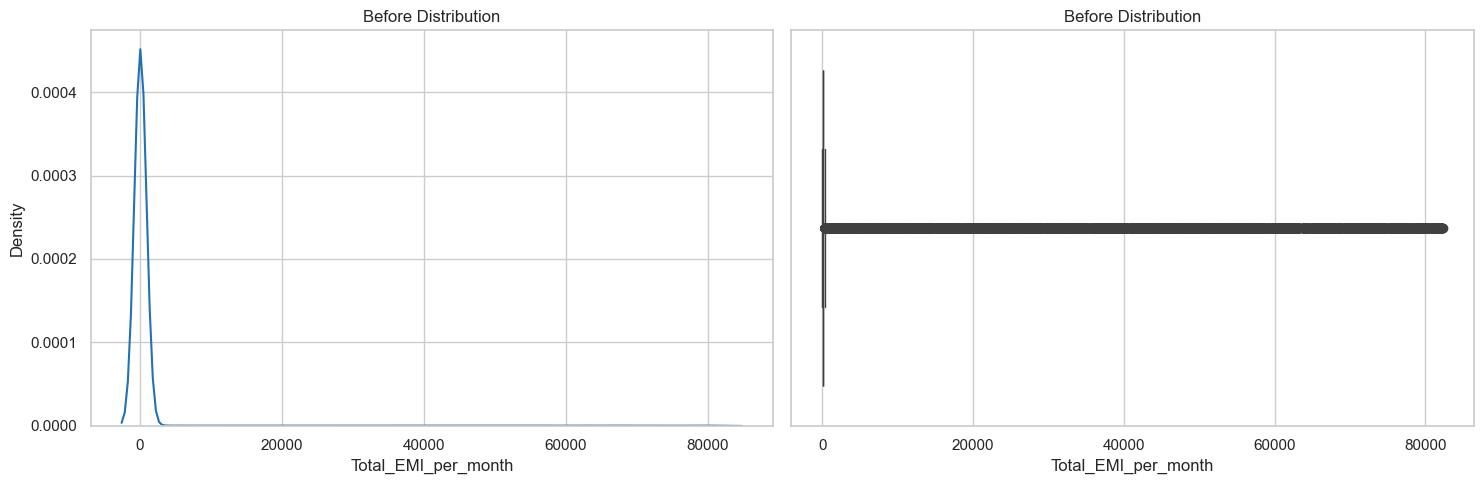

In [368]:
Distribution2(columne='Total_EMI_per_month',data=data,i=0)

In [369]:
data=data[data['Total_EMI_per_month']<5000]

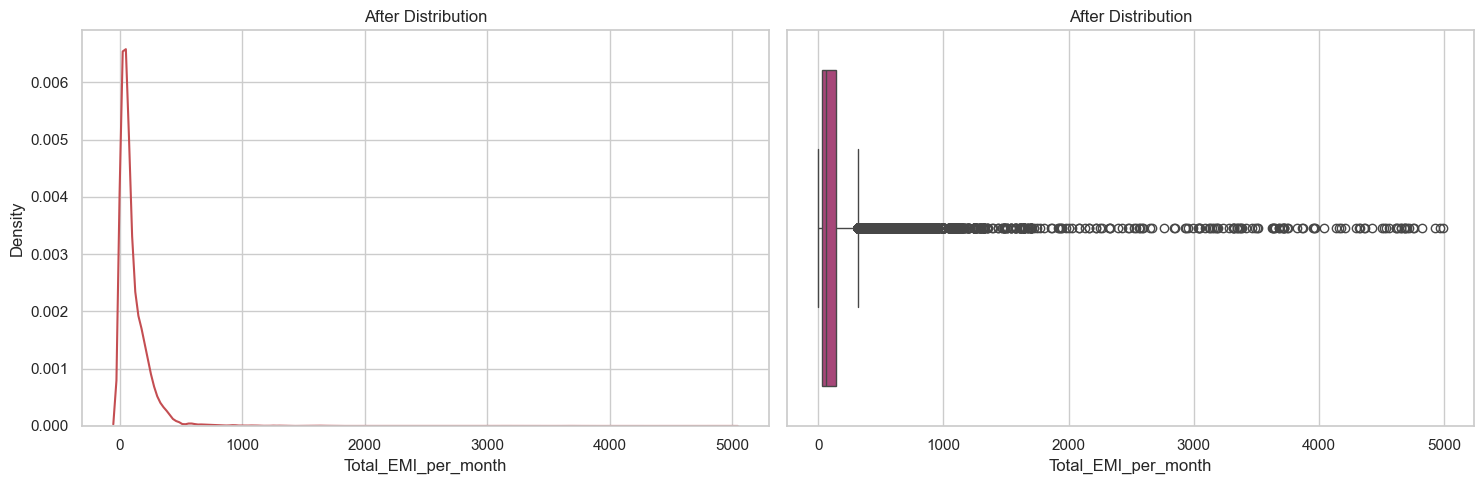

In [370]:
Distribution2(columne='Total_EMI_per_month',data=data,i=1)

In [371]:
data.shape

(87865, 35)

## İşlenmiş verileri csv olarak kaydediyoruz

In [372]:
data.head(3)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0


In [373]:
data.to_csv(r"Data\\bank_data.csv", index=False)
#Düzenlenmiş verileri csv dosyası olarak kaydettik

In [374]:
process_df= pd.read_csv("Data\\bank_data.csv",sep = "," , encoding = "utf-8")
#dosyayı tekrar okuduk

In [375]:
process_df.head(3)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0


## Modellerimizde kullanmadığımız sütunları silme işlemi

In [376]:
def drop_columns(DataFrame):
    lazy_list=['ID','Customer_ID','Name']
    DataFrame.drop(lazy_list, axis=1, inplace=True)
drop_columns(process_df)

## Label encoding işlemi

In [377]:
#Ayları numaralandırdık e-num
process_df['Month'] = process_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [378]:
Occupation_le = LabelEncoder()
#Meslekleri etiketledik
process_df['Occupation'] = Occupation_le.fit_transform(process_df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [379]:
Credit_Mix_le = LabelEncoder()

process_df['Credit_Mix'] = Credit_Mix_le.fit_transform(process_df['Credit_Mix'])
Credit_Mix_le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [380]:
Payment_Behaviour_le = LabelEncoder()

process_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(process_df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [381]:
Payment_of_Min_Amount_le = LabelEncoder()

process_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(process_df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['NM', 'No', 'Yes'], dtype=object)

## Veri ölçeklendirme ve veri setinin bölünmesi, makine öğrenimi modellerinin eğitiminde ve değerlendirilmesi

In [382]:
x = process_df.drop('Credit_Score',axis=1)#bagımsız degisken
y = process_df['Credit_Score']#bagımlı degisken

In [383]:
y_le = LabelEncoder()
#'Bağımlı değişkeni' LabelEncoder ile dönüştürdük LabelEncoder'ın fit_transform() yöntemi,
#bağımlı değişkenin kategorik değerlerini sayısal değerlere dönüştürmek için kullandık.
y_Encode = y_le.fit_transform(y)
y_le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [384]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
#Verimizi ölçeklendirdik

In [385]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x)
print("Orjinal özelliklerin sayısı {} ve indirgenmiş özelliklerin sayısı {}".format(x.shape[1], x_reduced.shape[1]))

Orjinal özelliklerin sayısı 31 ve indirgenmiş özelliklerin sayısı 22


## Model

In [386]:
#sınıflandırma modelinizin performansını değerlendirmek için kullanacağımız fonksiyon
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [387]:
#LogisticRegression sınıflandırma modelini eğittik

In [388]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()
    #modelin özellikleri çubuk grafik üzerinde gösteren fonksiyon

In [389]:
features = process_df.drop(['Credit_Score'] , axis = 1)

## 1. Logistic Regression
* Lojistik Regresyon Sınıflandırma, danışmanlı öğrenme algoritması kullanarak sınıflandırma problemleri için kullanılan bir modeldir. Veriyi bir veya birden fazla özellik üzerinden analiz ederek, bir veya daha fazla sınıfa tahminlerde bulunur.

In [390]:
from sklearn.linear_model import LogisticRegression
#Kütüphanemizi import ettik

In [391]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#Verilerimizi test ve train verisi olarak 2' ye ayırdık

In [392]:
lr = LogisticRegression(C = 100)
#Regularization parametresini verdik

In [393]:
lr.fit(x_train , y_train)
#Modeli eğittik

LogisticRegression(C=100)

In [394]:
lr_score_train=lr.score(x_train , y_train)
lr_score_train
#Modelin eğitim veri seti üzerindeki başarı puanı

0.6532964799609788

In [395]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test
#Modelin test  veri seti üzerindeki başarı puanı

0.6524658573596358

Training Accuracy Logistic Regression 65.32964799609789  Test Accuracy Logistic Regression 65.24658573596358


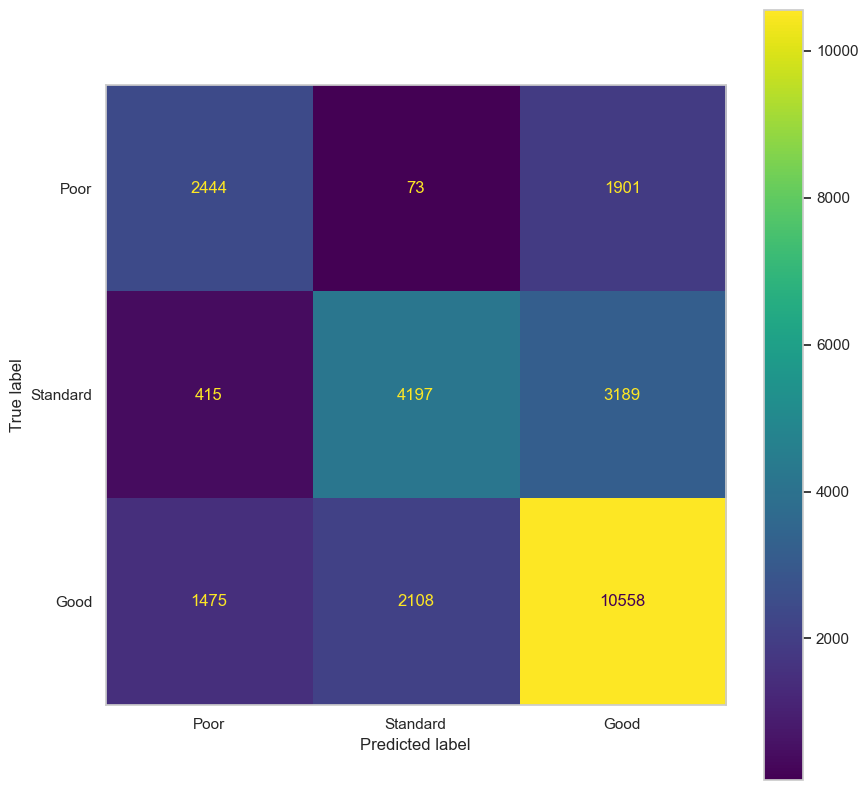

In [396]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)
#Konfüzyon matrisi


In [397]:
Y_pred=lr.predict(x_test)

In [398]:
pd.DataFrame((lr.coef_).T ,process_df.drop('Credit_Score',axis=1).columns ).T
 #Modelimizin her bir özellik için olan katsayılarını dataframe attık

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.347759,0.205572,-0.065549,0.654903,-0.838968,0.044480,-2.045814,-1.592983,-0.743288,-1.928654,0.997565,0.530727,-2.674836,-1.606654,-1.069813,-0.053694,0.598215,-0.322735,3.175966,0.509882,-0.596950,-0.919278,0.008038,0.053943,0.017635,0.028060,0.085104,0.066356,0.035678,-0.022937,0.007280
1,-0.208443,-0.181549,0.044412,-0.410620,0.843709,-0.206402,1.562010,1.623504,0.299664,1.406636,-3.590358,-1.524252,3.976025,0.455254,0.783772,-0.007166,-0.590838,0.143075,-1.809811,-0.776923,0.597569,0.455528,0.036897,0.011045,0.007227,-0.010642,-0.023985,-0.024823,0.007681,0.014925,0.049895
2,-0.139316,-0.024023,0.021137,-0.244283,-0.004741,0.161922,0.483804,-0.030520,0.443624,0.522017,2.592793,0.993525,-1.301189,1.151400,0.286041,0.060860,-0.007377,0.179660,-1.366155,0.267041,-0.000619,0.463749,-0.044934,-0.064988,-0.024862,-0.017418,-0.061119,-0.041533,-0.043359,0.008012,-0.057174


In [399]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T
#Karşılaştırma verileri

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Standard,Standard,Poor,Standard,Poor,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Good,Poor,Poor,Standard,Good,Standard,Standard,Standard


## 2. KNN 
* K-Nearest Neighbors (KNN), danışmansız öğrenme algoritmasıyla çalışan ve sınıflandırma veya regresyon problemleri için kullanılan bir makine öğrenmesi modelidir. Veri noktalarının etrafındaki komşularını dikkate alarak tahminler yapar veya sınıflandırır.

In [400]:
from sklearn.neighbors import KNeighborsClassifier
#Kütüphanemizi import ettik

In [401]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#Verilerimizi test ve train verisi olarak 2' ye ayırdık

In [402]:
knn = KNeighborsClassifier(n_neighbors=7)
##knn komşu katsayısını 7 olarak belirledik

In [403]:
knn.fit(x_train , y_train)
#Modeli eğittik

KNeighborsClassifier(n_neighbors=7)

In [404]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train
#Eğitim veri setindeki başarı oranı

0.8031704739452077

In [405]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test
#test veri setindeki başarı oranı



0.723216995447648

Training Accuracy KNeighborsClassifiern 80.31704739452077  Test Accuracy KNeighborsClassifiern 72.3216995447648


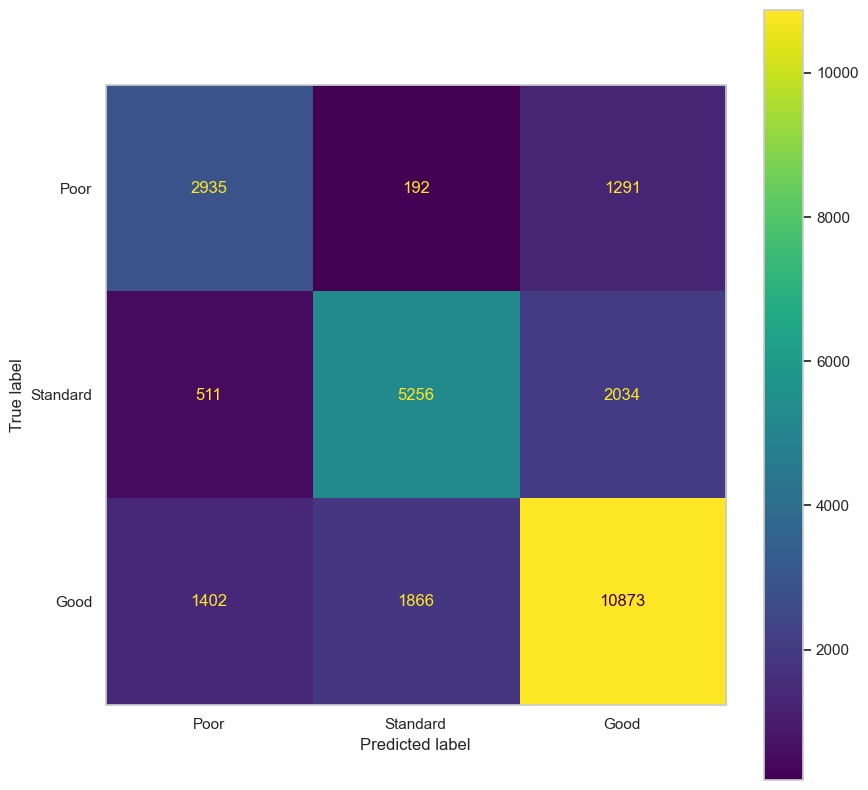

In [406]:
evaluate_classification(knn, "KNeighborsClassifiern", x_train,x_test,y_train,y_test)
#Konfüzyon matrisi

In [407]:
Y_pred=knn.predict(x_test)

In [408]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T
#Karşılaştırmalar

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Poor,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Good,Standard,Standard,Poor,Good,Poor,Poor,Standard,Good,Poor,Good,Poor


## 3. GradientBoostingClassifier
* GradientBoostingClassifier, danışmanlı öğrenme algoritmasıyla çalışan ve sınıflandırma problemleri için kullanılan bir makine öğrenmesi modelidir. Bu model, zayıf öğrenicileri (örneğin karar ağaçları) bir araya getirerek ardışık olarak eğitir ve tahminler yapar, böylece verilerdeki desenleri daha iyi öğrenir ve yüksek performanslı sonuçlar sağlar.

Classification Report:
              precision    recall  f1-score   support

        Good       0.58      0.71      0.64      4418
        Poor       0.74      0.66      0.70      7801
    Standard       0.76      0.76      0.76     14141

    accuracy                           0.72     26360
   macro avg       0.69      0.71      0.70     26360
weighted avg       0.73      0.72      0.72     26360


Confusion Matrix:
[[ 3130    72  1216]
 [  540  5113  2148]
 [ 1752  1683 10706]]


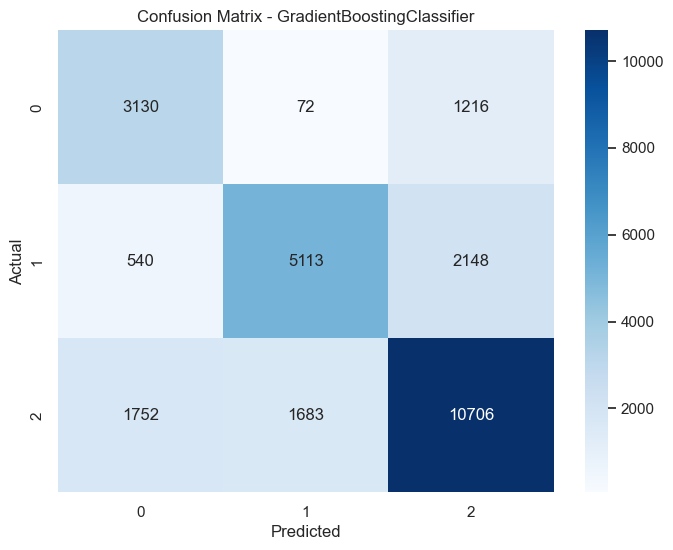

Accuracy: 71.89%


In [409]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Verilerinizi yükleyin ve hazırlayın (process_df'nin önceden tanımlandığını varsayıyoruz)
x = process_df.drop('Credit_Score', axis=1)
y = process_df['Credit_Score']

# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

# Daha az sayıda ağaç (estimator) kullanarak GradientBoostingClassifier modelini oluşturma ve eğitme
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yapma
y_pred = gb_model.predict(X_test)

# Sınıflandırma raporunu ve karmaşıklık matrisini yazdırma
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Konfüzyon matrisini renkli şekilde gösterme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GradientBoostingClassifier")
plt.show()

# Doğruluk skorunu hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


## 4. Random forest
* Random Forest, danışmanlı öğrenme algoritmasıyla çalışan ve sınıflandırma veya regresyon problemleri için kullanılan bir makine öğrenmesi modelidir. Bu model, birçok karar ağacının rastgele özelliklerle eğitilmesi ve ardından tahminlerin bir araya getirilmesiyle oluşturulur, bu da daha güçlü ve genelleştirilmiş bir model sağlar.

In [410]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest modelinin kütüphanelerini import ettik

In [411]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#Verilerimizi test ve train verisi olarak 2' ye ayırdık

In [412]:
rf = RandomForestClassifier(max_features=15 , max_depth=12)
#Random forest modeli için derinlik ve özellik katsayılarımızı belirledik

In [413]:
rf.fit(x_train , y_train)
#Modelimizi eğittik

RandomForestClassifier(max_depth=12, max_features=15)

In [414]:
rf_score_train=rf.score(x_train , y_train)
rf_score_train
#Modelimizin Eğitim verilerimiz üstündeki başarı oranı 

0.7933826518169255

In [415]:
rf_score_test=rf.score(x_test , y_test)
rf_score_test
#Modelimizin test verilerimiz üstündeki başarı oranı 

0.7517071320182094

Training Accuracy RandomForestClassifier 79.33826518169255  Test Accuracy RandomForestClassifier 75.17071320182094


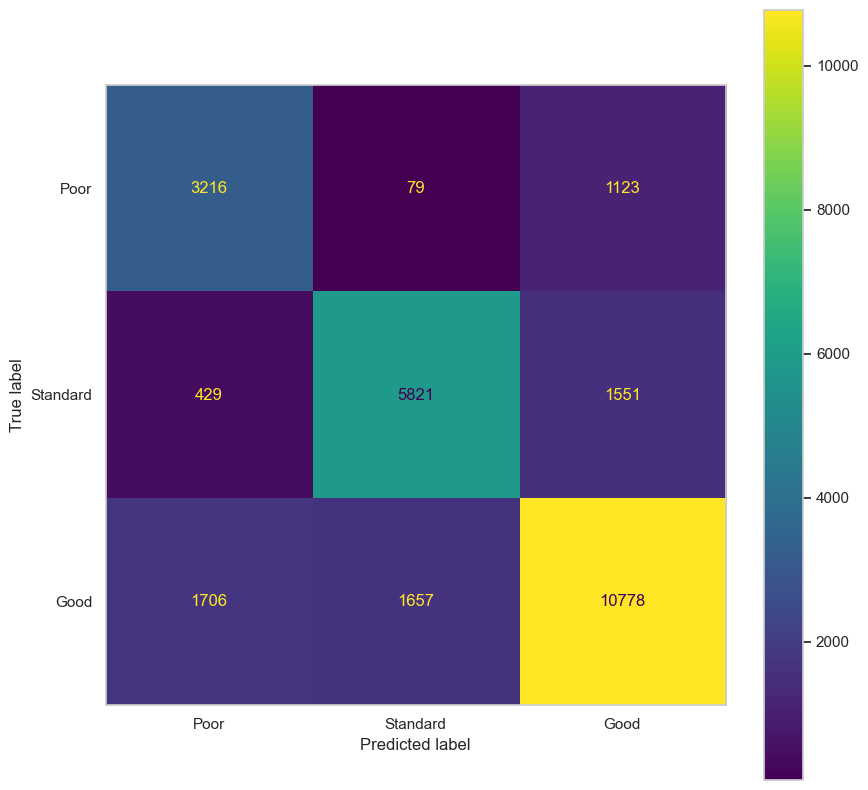

In [416]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)
#Konfüzyon matrisi

In [417]:
Y_pred=rf.predict(x_test)

In [418]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T
#Karşılaştırmalar

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Standard,Poor,Standard,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Poor,Poor,Standard,Good,Standard,Standard,Standard


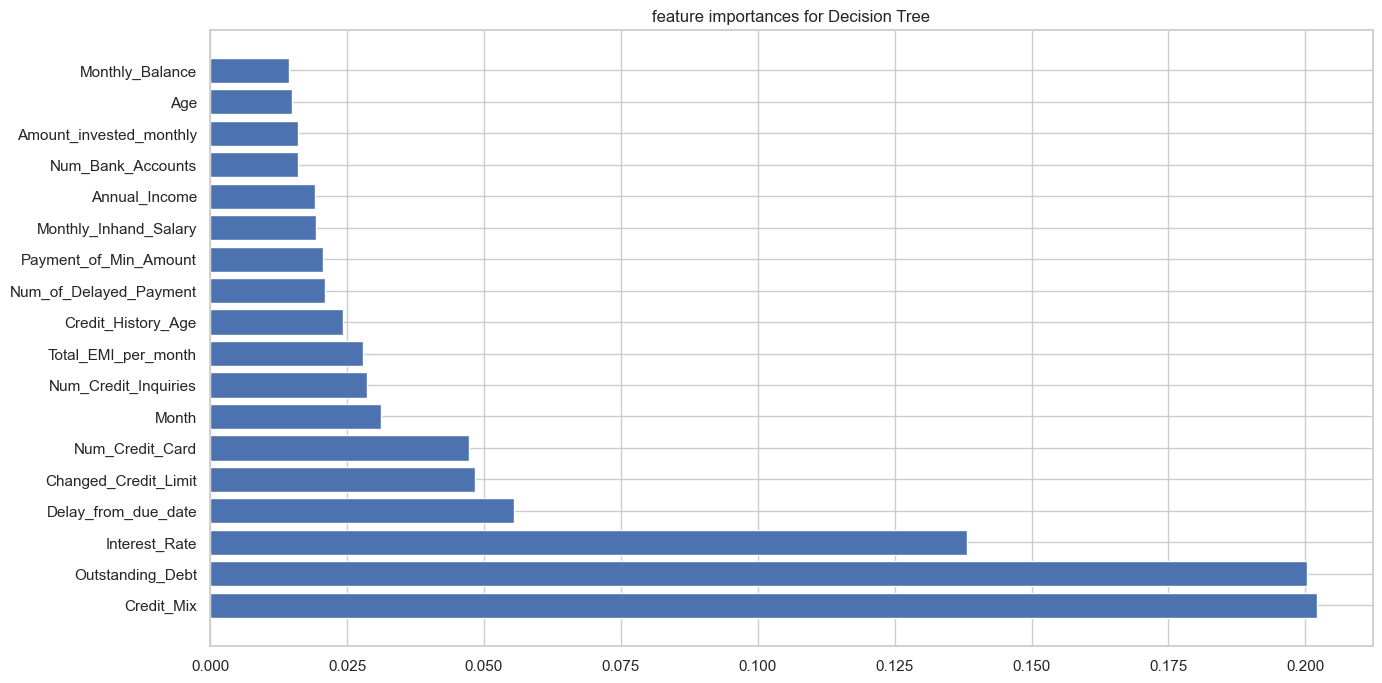

In [419]:
feature_importances(abs(rf.feature_importances_), features, top=18)
#Özelliklerimizin karar ağacı üzerindeki yoğunluk dağılımı

## 5. XGBOOST
* XGBoost, danışmanlı öğrenme algoritmasıyla çalışan, hem sınıflandırma hem de regresyon problemleri için kullanılan, gradient boosting yöntemini uygulayan ve özellikle büyük ölçekli veri kümelerinde yüksek performans sağlayan bir makine öğrenmesi modelidir.

In [420]:
from xgboost import XGBClassifier
#XGBOOST modelinin kütüphanelerini import ettik

In [421]:
x_train,x_test,y_train,y_test = train_test_split(x,y_Encode, test_size=0.3,random_state = 1234)
#Verilerimizi test ve train verisi olarak 2' ye ayırdık

In [422]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
#XGBOOST modelimizin katsayılarını veriyoruz

In [423]:
xgb.fit(x_train , y_train)
#Modelimizi eğittik

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [424]:
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_train
#Modelimizin Eğitim verilerimiz üstündeki başarı oranı 

0.7201528331029997

In [425]:
xgb_score_test=xgb.score(x_test , y_test)
xgb_score_test
#Modelimizin TEST verilerimiz üstündeki başarı oranı 

0.7174506828528073

Training Accuracy XGBOOST 72.01528331029998  Test Accuracy XGBOOST 71.74506828528074


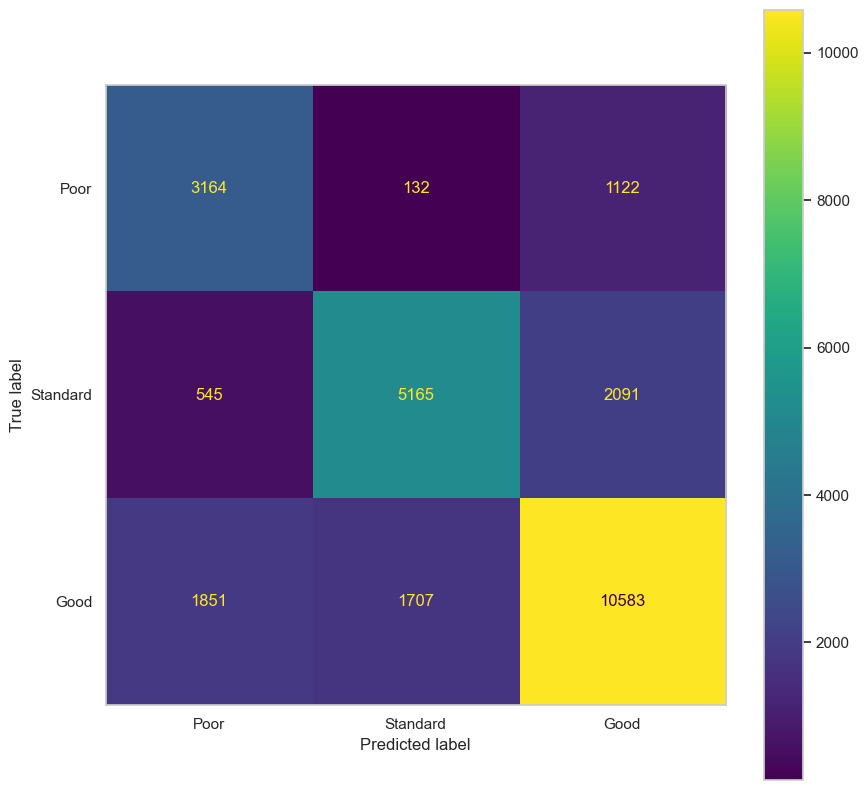

In [426]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)
#Konfüzyon matrisi

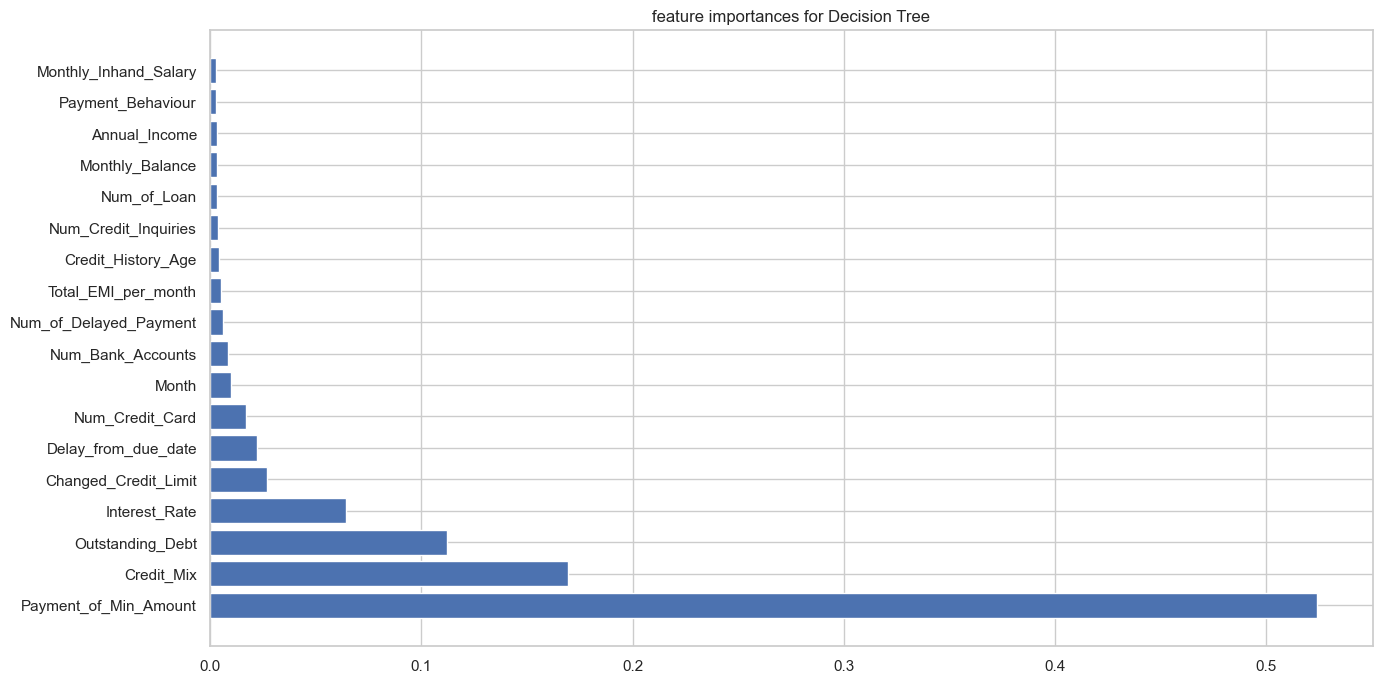

In [427]:
feature_importances(abs(xgb.feature_importances_), features, top=18)
#Özelliklerimizin karar ağacı üzerindeki yoğunluk dağılımı


In [428]:
Y_pred=xgb.predict(x_test)

In [429]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T
#Karşılaştırmalar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,0,0,1,2,1,2,2,1,2,2,2,1,0,2,1,2,0,2,2,2


## 6. adaboost
* AdaBoost, danışmanlı öğrenme algoritmasıyla çalışan ve sınıflandırma problemleri için kullanılan, zayıf öğrenicileri (weak learners) bir araya getirerek güçlü bir sınıflandırıcı oluşturan bir makine öğrenmesi tekniğidir.

In [430]:
from sklearn.ensemble import AdaBoostClassifier
#ADAOOST modelinin kütüphanelerini import ettik

In [431]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
#Verilerimizi test ve train verisi olarak 2' ye ayırdık

In [432]:
ada = AdaBoostClassifier(n_estimators=8, learning_rate=0.8)
#ADAOOST modelimizin katsayılarını veriyoruz

In [433]:
ada.fit(x_train , y_train)
#Modelimizi eğittik

AdaBoostClassifier(learning_rate=0.8, n_estimators=8)

In [434]:
ada_score_train=ada.score(x_train , y_train )
ada_score_train
#Modelimizin Eğitim verilerimiz üstündeki başarı oranı 

0.6371839687830257

In [435]:
ada_score_test=ada.score(x_test , y_test)
ada_score_test
#Modelimizin TEST verilerimiz üstündeki başarı oranı 

0.6345599393019726

Training Accuracy adaboost 63.71839687830258  Test Accuracy adaboost 63.455993930197266


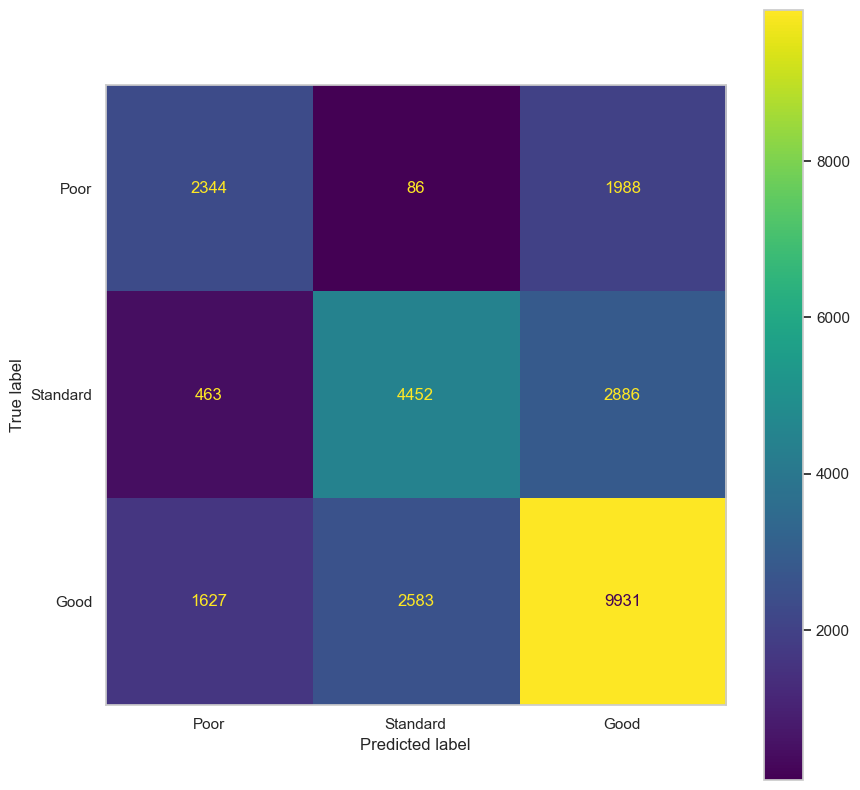

In [436]:
evaluate_classification(ada, "adaboost", x_train,x_test,y_train,y_test)
#Konfüzyon Matrisini verdik

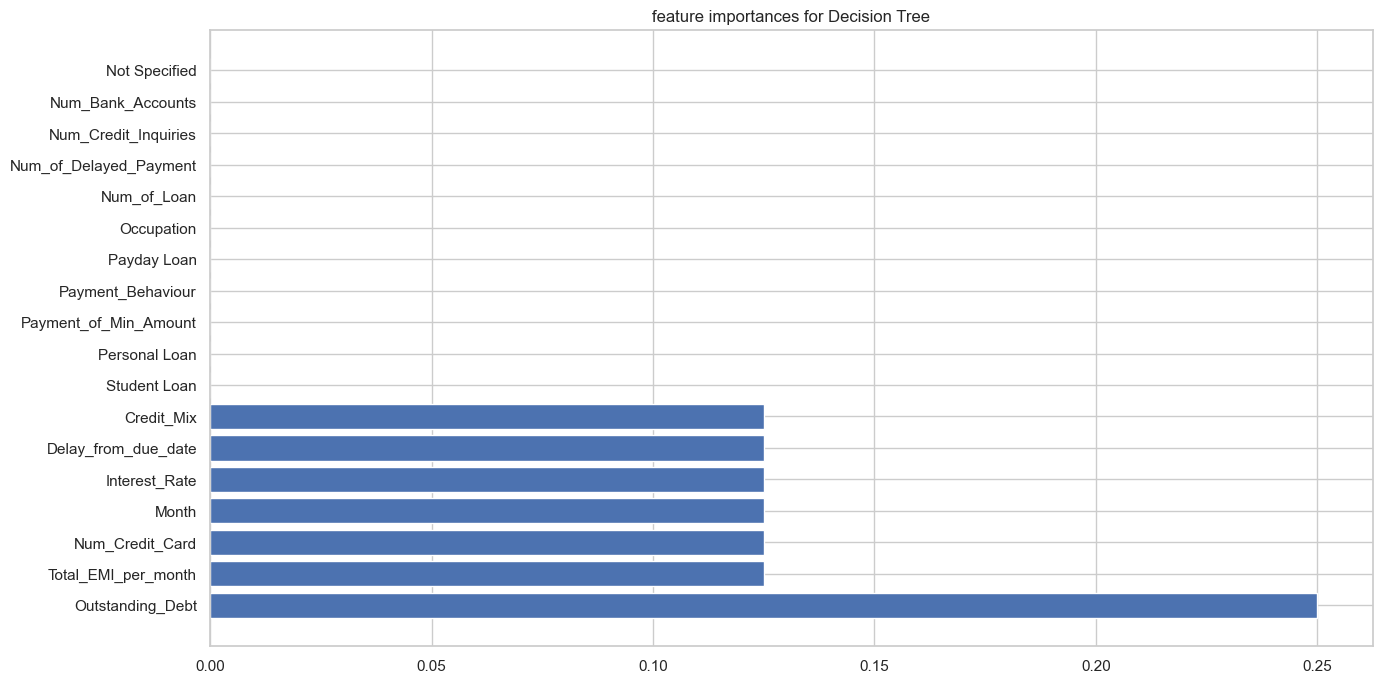

In [437]:
feature_importances(abs(ada.feature_importances_), features, top=18)
#Özelliklerimizin karar ağacı üzerindeki yoğunluk dağılımı

In [438]:
Y_pred=ada.predict(x_test)

In [439]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T
#karşılaştırmalar

,5253,48731,16702,68655,57597,69092,67616,66667,43348,40267,47015,43573,3377,33062,73517,66017,10889,85139,27520,3077
Y_test,Standard,Standard,Poor,Good,Poor,Standard,Standard,Poor,Standard,Standard,Standard,Poor,Good,Standard,Poor,Standard,Standard,Standard,Good,Poor
Y_pred,Good,Good,Poor,Standard,Poor,Standard,Standard,Standard,Good,Standard,Standard,Poor,Standard,Poor,Poor,Standard,Good,Standard,Standard,Good


## 7. Naive Bayes Modeli
* Naive Bayes Modeli, danışmansız öğrenme algoritmasıyla çalışan ve sınıflandırma problemleri için kullanılan, Bayes teoreminin varsayımları gereği özellikler arasında bağımsızlık varsayımı yaparak sınıflandırma yapan bir makine öğrenmesi modelidir.

Classification Report:
              precision    recall  f1-score   support

        Good       0.38      0.84      0.53      4418
        Poor       0.63      0.70      0.66      7801
    Standard       0.80      0.45      0.58     14141

    accuracy                           0.59     26360
   macro avg       0.60      0.66      0.59     26360
weighted avg       0.68      0.59      0.60     26360


Confusion Matrix:
[[3697  119  602]
 [1345 5478  978]
 [4596 3131 6414]]

Accuracy: 0.59


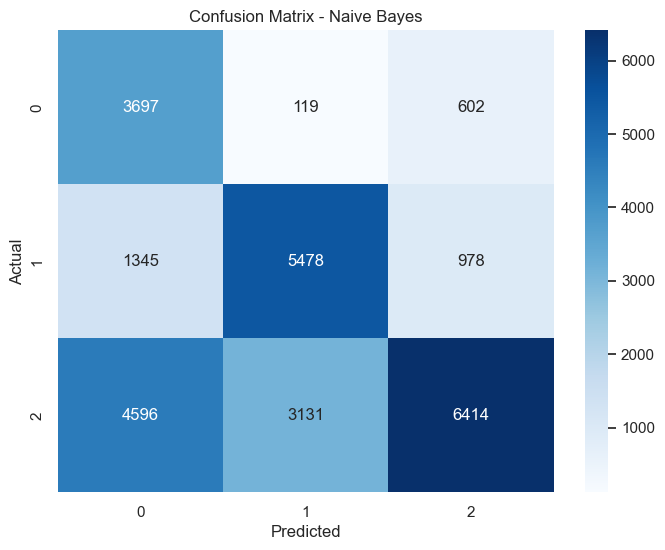

In [440]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes modelini oluşturma ve eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Sınıflandırma raporunu ve karmaşıklık matrisini yazdırma
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy'yi yazdırma
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Konfüzyon matrisini renkli şekilde gösterme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## 8. SVC Modeli
* SVC (Support Vector Classifier) linear Modeli, danışmanlı öğrenme algoritmasıyla çalışan ve sınıflandırma problemleri için kullanılan, özellikleri birbirinden ayıran düzlem veya doğrultular arasındaki sınırları belirleyerek veriyi sınıflandıran bir makine öğrenmesi modelidir.

Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.28      0.36      4418
        Poor       0.64      0.45      0.53      7801
    Standard       0.61      0.81      0.70     14141

    accuracy                           0.61     26360
   macro avg       0.59      0.51      0.53     26360
weighted avg       0.61      0.61      0.59     26360


Confusion Matrix:
[[ 1219    72  3127]
 [  304  3482  4015]
 [  889  1846 11406]]

Accuracy: 0.61


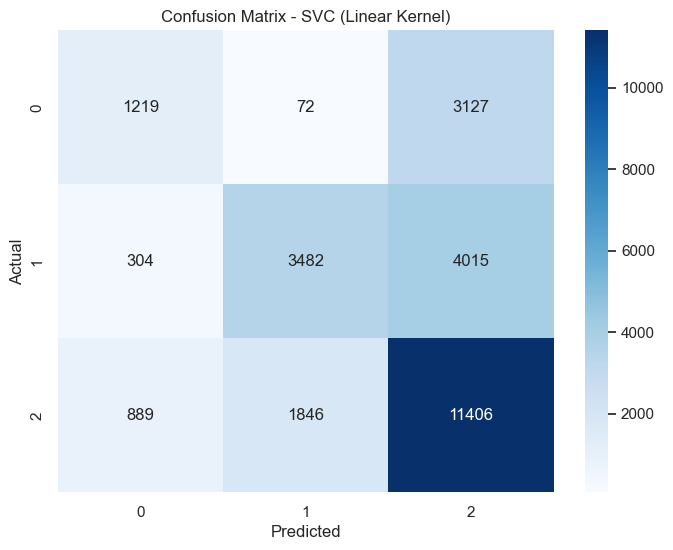

In [441]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Verinin sadece %10'unu kullanmak için train_test_split fonksiyonunu kullanma
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

# SVC modelini oluşturma ve eğitme (lineer kernel kullanarak)
svc_model_linear = SVC(kernel='linear')
svc_model_linear.fit(X_train_small, y_train_small)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yapma
y_pred_linear = svc_model_linear.predict(X_test)

# Sınıflandırma raporunu ve karmaşıklık matrisini yazdırma
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))

# Accuracy'yi yazdırma
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"\nAccuracy: {accuracy_linear:.2f}")

# Konfüzyon matrisini renkli şekilde gösterme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVC (Linear Kernel)")
plt.show()


## 10. CatBoost Modeli
* CatBoost Modeli, sınıflandırma ve regresyon problemleri için kullanılan, gradient boosting yöntemini temel alan, kategorik değişkenleri otomatik olarak işleyen ve hızlı eğitim süreleri sağlayan bir makine öğrenmesi modelidir.

Classification Report:
              precision    recall  f1-score   support

        Good       0.57      0.61      0.59      4418
        Poor       0.70      0.66      0.68      7801
    Standard       0.73      0.75      0.74     14141

    accuracy                           0.70     26360
   macro avg       0.67      0.67      0.67     26360
weighted avg       0.70      0.70      0.70     26360


Confusion Matrix:
[[ 2675   115  1628]
 [  500  5115  2186]
 [ 1492  2108 10541]]

Accuracy: 0.70


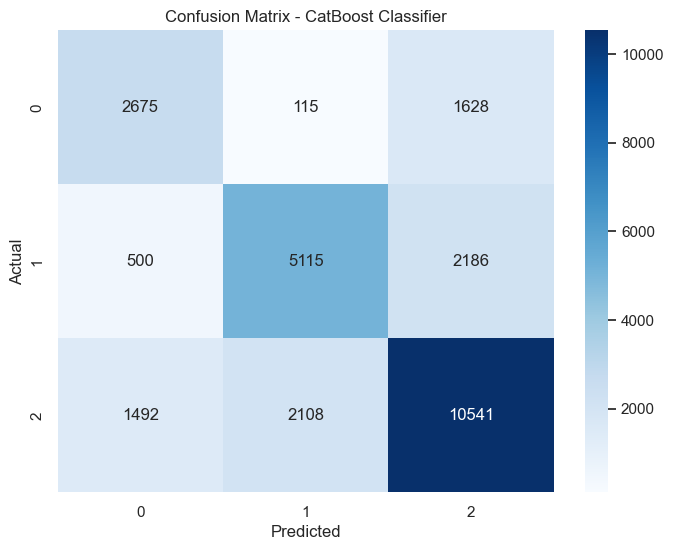

In [442]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Verinin sadece %10'unu kullanmak için train_test_split fonksiyonunu kullanma
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

# CatBoost modelini oluşturma ve eğitme
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_small, y_train_small, verbose=0)

# Eğitilmiş modeli kullanarak test seti üzerinde tahmin yapma
y_pred = catboost_model.predict(X_test)

# Sınıflandırma raporunu ve karmaşıklık matrisini yazdırma
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy'yi yazdırma
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Konfüzyon matrisini renkli şekilde gösterme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


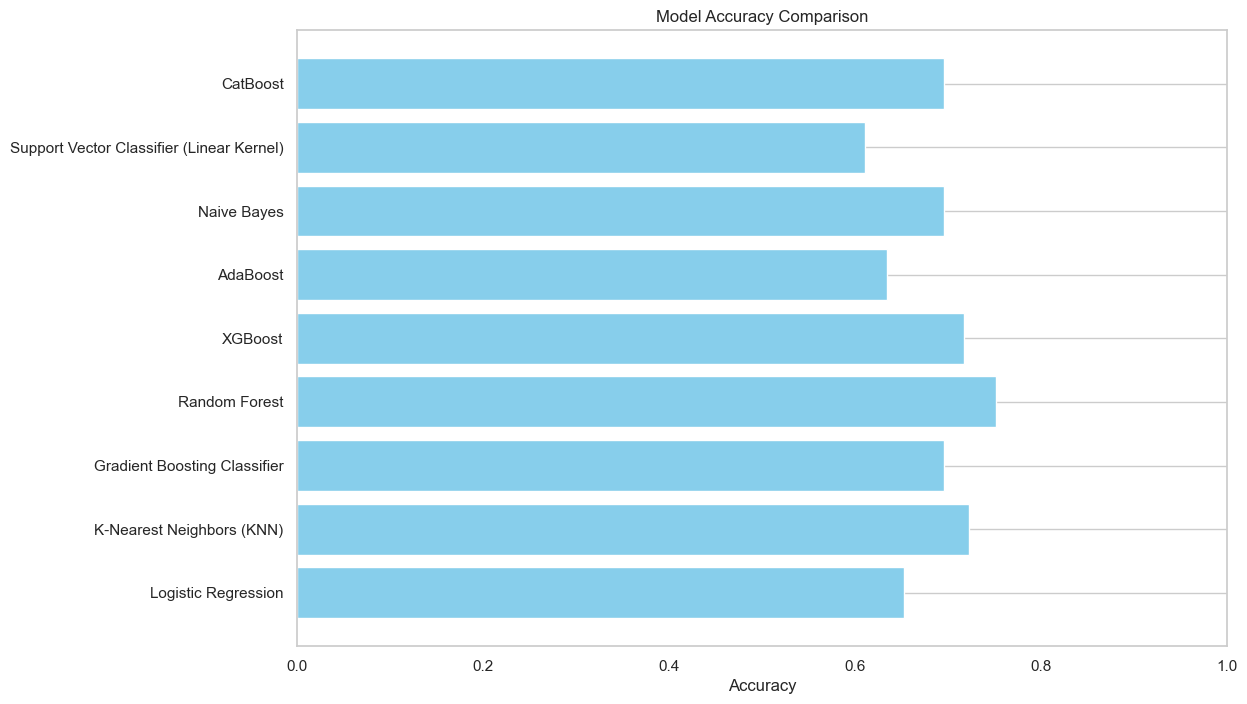

In [443]:
import matplotlib.pyplot as plt

# Model isimleri ve doğruluk değerleri
model_names = [
    "Logistic Regression",
    "K-Nearest Neighbors (KNN)",
    "Gradient Boosting Classifier",
    "Random Forest",
    "XGBoost",
    "AdaBoost",
    "Naive Bayes",
    "Support Vector Classifier (Linear Kernel)",
    "CatBoost"
]

# Modellerin doğruluk değerleri (örnek değerler)
accuracy_values = [
    lr_score_test,
    knn_score_test,
    accuracy,  # GradientBoostingClassifier accuracy
    rf_score_test,
    xgb_score_test,
    ada_score_test,
    accuracy,  # Naive Bayes accuracy
    accuracy_linear,  # SVC Linear Kernel accuracy
    accuracy  # CatBoost accuracy
]

# Doğruluk değerlerini grafik ile karşılaştırma
plt.figure(figsize=(12, 8))
plt.barh(model_names, accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Accuracy values are between 0 and 1
plt.grid(axis='x')
plt.show()
